In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/content/flight2000.csv")

In [3]:
data.head()

Unnamed: 0.1  Unnamed: 0    airline  flight source_city departure_time  \
0         27131       27131  Air_India  AI-506       Delhi        Morning   
1        266857      266857    Vistara  UK-706     Kolkata        Morning   
2        141228      141228    Vistara  UK-772     Kolkata        Morning   
3        288329      288329    Vistara  UK-824     Chennai          Night   
4         97334       97334  Air_India  AI-501   Bangalore      Afternoon   

  stops   arrival_time destination_city     class  duration  days_left  price  
0   one  Early_Morning          Kolkata   Economy     19.75         40   7366  
1   one          Night           Mumbai  Business      9.83         42  64831  
2   one          Night        Bangalore   Economy     10.50         41   6195  
3   one        Morning            Delhi  Business     14.50         14  60160  
4   one          Night           Mumbai   Economy      8.25         20   6578

In [4]:
# Unnamed: 0.1, Unnamed: 0: Likely index columns (can be dropped).
# airline: Name of the airline.
# flight: Flight ID/code.
# source_city: Departure city.
# departure_time: Time of departure (categorical:Morning, Night).
# stops: Number of stops (zero, one).
# arrival_time: Time of arrival (categorical).
# destination_city: Arrival city.
# class: Travel class (Economy/Business).
# duration: Duration of flight in hours.
# days_left: Days left until the flight.
# price: Target variable (Price of the ticket).

In [5]:
# Drop unnecessary columns
data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)

# Display basic info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           2000 non-null   object 
 1   flight            2000 non-null   object 
 2   source_city       2000 non-null   object 
 3   departure_time    2000 non-null   object 
 4   stops             2000 non-null   object 
 5   arrival_time      2000 non-null   object 
 6   destination_city  2000 non-null   object 
 7   class             2000 non-null   object 
 8   duration          2000 non-null   float64
 9   days_left         2000 non-null   int64  
 10  price             2000 non-null   int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 172.0+ KB
None


In [6]:
print(data.describe(include='all'))

        airline  flight source_city departure_time stops arrival_time  \
count      2000    2000        2000           2000  2000         2000   
unique        6     633           6              6     3            6   
top     Vistara  UK-826       Delhi        Morning   one        Night   
freq        858      24         418            464  1680          598   
mean        NaN     NaN         NaN            NaN   NaN          NaN   
std         NaN     NaN         NaN            NaN   NaN          NaN   
min         NaN     NaN         NaN            NaN   NaN          NaN   
25%         NaN     NaN         NaN            NaN   NaN          NaN   
50%         NaN     NaN         NaN            NaN   NaN          NaN   
75%         NaN     NaN         NaN            NaN   NaN          NaN   
max         NaN     NaN         NaN            NaN   NaN          NaN   

       destination_city    class     duration    days_left          price  
count              2000     2000  2000.000000  

In [7]:
data.describe()

duration    days_left          price
count  2000.000000  2000.000000    2000.000000
mean     12.185170    26.005000   20398.260000
std       7.160622    13.532869   22707.467842
min       1.000000     1.000000    1105.000000
25%       6.670000    14.000000    4833.750000
50%      11.330000    26.000000    7080.500000
75%      16.170000    38.000000   41314.000000
max      36.830000    49.000000  102832.000000

In [8]:
print(data.isnull().sum())

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


In [9]:
airline = data.airline.unique()
print(airline)

['Air_India' 'Vistara' 'AirAsia' 'Indigo' 'SpiceJet' 'GO_FIRST']


In [10]:
flights_Code = data.flight.value_counts().head(20).sort_values(ascending=False)
print(flights_Code)

flight
UK-826    24
UK-706    24
UK-874    24
UK-720    22
UK-774    20
UK-870    19
UK-772    18
UK-738    18
UK-822    18
UK-860    17
UK-824    16
UK-850    15
AI-770    15
UK-876    15
AI-543    14
UK-836    14
UK-928    14
UK-834    13
UK-776    13
UK-828    13
Name: count, dtype: int64


In [11]:
data['airline'].value_counts()

airline
Vistara      858
Air_India    524
Indigo       285
GO_FIRST     151
AirAsia      121
SpiceJet      61
Name: count, dtype: int64

In [12]:
data['source_city'].value_counts()

source_city
Delhi        418
Mumbai       411
Bangalore    339
Kolkata      322
Hyderabad    285
Chennai      225
Name: count, dtype: int64

In [13]:
data['departure_time'].value_counts()

departure_time
Morning          464
Evening          444
Early_Morning    432
Night            345
Afternoon        311
Late_Night         4
Name: count, dtype: int64

In [14]:
data['stops'].value_counts()

stops
one            1680
zero            232
two_or_more      88
Name: count, dtype: int64

In [15]:
data['class'].value_counts()

class
Economy     1403
Business     597
Name: count, dtype: int64

In [16]:
data['destination_city'].value_counts()

destination_city
Mumbai       411
Delhi        365
Kolkata      336
Bangalore    328
Hyderabad    285
Chennai      275
Name: count, dtype: int64

In [17]:
data.shape

(2000, 11)

In [18]:
data['stops'] = data['stops'].map({'zero' : 0,'one':1,'two_or_more':2})
data["stops"].unique(),data['stops'].value_counts()

(array([1, 0, 2]),
 stops
 1    1680
 0     232
 2      88
 Name: count, dtype: int64)

In [19]:
df = data.groupby(['days_left'])['price'].mean().reset_index()
df.head()

days_left         price
0          1  19814.823529
1          2  36991.176471
2          3  40193.478261
3          4  23399.444444
4          5  28662.606061

In [20]:
data['duration'] = np.where(data['duration']>=48 ,data['duration'].median(), data['duration'])
data.head()

airline  flight source_city departure_time  stops   arrival_time  \
0  Air_India  AI-506       Delhi        Morning      1  Early_Morning   
1    Vistara  UK-706     Kolkata        Morning      1          Night   
2    Vistara  UK-772     Kolkata        Morning      1          Night   
3    Vistara  UK-824     Chennai          Night      1        Morning   
4  Air_India  AI-501   Bangalore      Afternoon      1          Night   

  destination_city     class  duration  days_left  price  
0          Kolkata   Economy     19.75         40   7366  
1           Mumbai  Business      9.83         42  64831  
2        Bangalore   Economy     10.50         41   6195  
3            Delhi  Business     14.50         14  60160  
4           Mumbai   Economy      8.25         20   6578

In [21]:
data[data['price']>=100000]

airline  flight source_city departure_time  stops arrival_time  \
1437  Vistara  UK-838     Chennai          Night      1      Morning   

     destination_city     class  duration  days_left   price  
1437          Kolkata  Business      11.5          3  102832

In [22]:
data1=data.groupby(['flight','airline'],as_index=False).count()
data1.airline.value_counts()

airline
Indigo       195
Air_India    128
Vistara      118
GO_FIRST      89
AirAsia       60
SpiceJet      43
Name: count, dtype: int64

In [23]:
data2=data.groupby(['flight','airline','class'],as_index=False).count()
data2['class'].value_counts()

class
Economy     604
Business    178
Name: count, dtype: int64

In [24]:
data.groupby(['flight','source_city','destination_city','airline','class'],as_index=False).count().groupby(['source_city','destination_city'],as_index=False)['flight'].count().head(10)

source_city destination_city  flight
0   Bangalore          Chennai      29
1   Bangalore            Delhi      63
2   Bangalore        Hyderabad      37
3   Bangalore          Kolkata      50
4   Bangalore           Mumbai      57
5     Chennai        Bangalore      19
6     Chennai            Delhi      32
7     Chennai        Hyderabad      30
8     Chennai          Kolkata      31
9     Chennai           Mumbai      26

In [25]:
data.groupby(['airline','source_city','destination_city'],as_index=False)['price'].mean().head(10)

airline source_city destination_city        price
0  AirAsia   Bangalore          Chennai  1712.500000
1  AirAsia   Bangalore            Delhi  5280.071429
2  AirAsia   Bangalore        Hyderabad  1714.000000
3  AirAsia   Bangalore          Kolkata  4657.222222
4  AirAsia   Bangalore           Mumbai  4753.142857
5  AirAsia     Chennai            Delhi  5227.750000
6  AirAsia     Chennai        Hyderabad  1550.000000
7  AirAsia     Chennai          Kolkata  4013.000000
8  AirAsia       Delhi        Bangalore  4516.800000
9  AirAsia       Delhi          Chennai  2323.333333

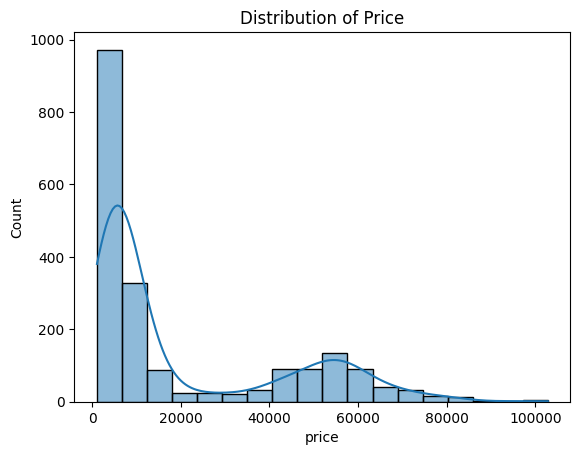

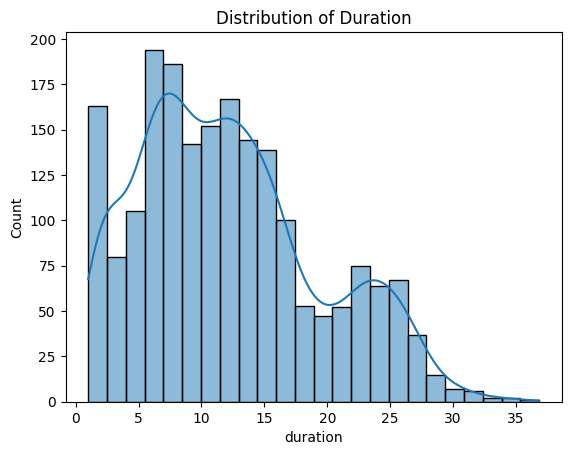

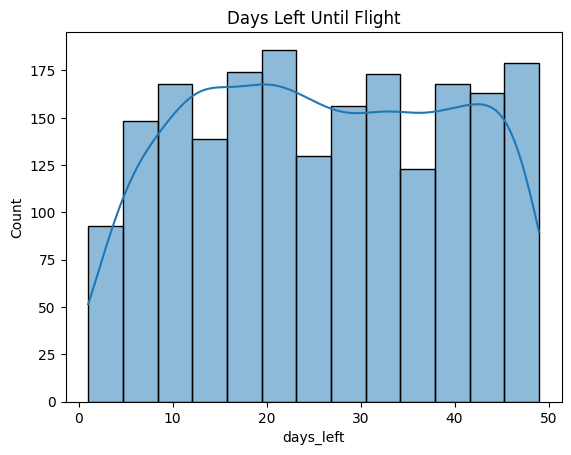

In [26]:
#Distribution of Numerical Features

sns.histplot(data['price'], kde=True)
plt.title("Distribution of Price")
plt.show()

sns.histplot(data['duration'], kde=True)
plt.title("Distribution of Duration")
plt.show()

sns.histplot(data['days_left'], kde=True)
plt.title("Days Left Until Flight")
plt.show()

In [27]:
data['booking_before_one_month'] = ['Yes' if x > 26 else 'No' for x in data['days_left']]
data.head()

airline  flight source_city departure_time  stops   arrival_time  \
0  Air_India  AI-506       Delhi        Morning      1  Early_Morning   
1    Vistara  UK-706     Kolkata        Morning      1          Night   
2    Vistara  UK-772     Kolkata        Morning      1          Night   
3    Vistara  UK-824     Chennai          Night      1        Morning   
4  Air_India  AI-501   Bangalore      Afternoon      1          Night   

  destination_city     class  duration  days_left  price  \
0          Kolkata   Economy     19.75         40   7366   
1           Mumbai  Business      9.83         42  64831   
2        Bangalore   Economy     10.50         41   6195   
3            Delhi  Business     14.50         14  60160   
4           Mumbai   Economy      8.25         20   6578   

  booking_before_one_month  
0                      Yes  
1                      Yes  
2                      Yes  
3                       No  
4                       No

In [28]:
# ÿßŸÑÿ±ÿ≥ŸÖ ÿßŸÑÿ®ŸäÿßŸÜŸä ÿßŸÑÿ£ŸàŸÑ (Distribution of Price):

# Ÿáÿ∞ÿß ÿßŸÑÿ±ÿ≥ŸÖ ÿßŸÑÿ®ŸäÿßŸÜŸä ŸáŸà ÿ±ÿ≥ŸÖ ÿ®ŸäÿßŸÜŸä ŸÑŸÑŸÖÿØÿ±ÿ¨ ÿßŸÑÿ™ŸÉÿ±ÿßÿ±Ÿä (histogram) ŸÖÿπ ÿ™ŸÇÿØŸäÿ± ÿßŸÑŸÉÿ´ÿßŸÅÿ© (KDE).
# Ÿäÿπÿ±ÿ∂ Ÿáÿ∞ÿß ÿßŸÑÿ±ÿ≥ŸÖ ÿßŸÑÿ®ŸäÿßŸÜŸä ÿ™Ÿàÿ≤Ÿäÿπ ÿ£ÿ≥ÿπÿßÿ± ÿ™ÿ∞ÿßŸÉÿ± ÿßŸÑÿ∑Ÿäÿ±ÿßŸÜ.
# ÿßŸÑŸÖÿ≠Ÿàÿ± ÿßŸÑÿ£ŸÅŸÇŸä ŸäŸÖÿ´ŸÑ ŸÜÿ∑ÿßŸÇ ÿßŸÑÿ£ÿ≥ÿπÿßÿ±.
# ÿßŸÑŸÖÿ≠Ÿàÿ± ÿßŸÑÿ±ÿ£ÿ≥Ÿä ŸäŸÖÿ´ŸÑ ÿπÿØÿØ ÿ™ÿ∞ÿßŸÉÿ± ÿßŸÑÿ∑Ÿäÿ±ÿßŸÜ ÿßŸÑÿ™Ÿä ÿ™ŸÇÿπ ÿ∂ŸÖŸÜ ŸÉŸÑ ŸÜÿ∑ÿßŸÇ ÿ≥ÿπÿ±Ÿä (ÿ£Ÿà ŸÉÿ´ÿßŸÅÿ© ÿßŸÑÿ™Ÿàÿ≤Ÿäÿπ).
# ŸÖŸÜ Ÿáÿ∞ÿß ÿßŸÑÿ±ÿ≥ŸÖÿå ŸäŸÖŸÉŸÜŸÉ ÿ±ÿ§Ÿäÿ© ŸÜÿ∑ÿßŸÇ ÿßŸÑÿ£ÿ≥ÿπÿßÿ± ÿßŸÑÿ£ŸÉÿ´ÿ± ÿ¥ŸäŸàÿπŸãÿß Ÿàÿ¥ŸÉŸÑ ÿßŸÑÿ™Ÿàÿ≤Ÿäÿπ ÿßŸÑÿπÿßŸÖ ŸÑŸÑÿ£ÿ≥ÿπÿßÿ± (ÿπŸÑŸâ ÿ≥ÿ®ŸäŸÑ ÿßŸÑŸÖÿ´ÿßŸÑÿå ŸÖÿß ÿ•ÿ∞ÿß ŸÉÿßŸÜ ŸÖŸÑÿ™ŸàŸäŸãÿß ÿ£Ÿà ŸÖÿ™ŸÖÿßÿ´ŸÑŸãÿß).
# ÿßŸÑÿ±ÿ≥ŸÖ ÿßŸÑÿ®ŸäÿßŸÜŸä ÿßŸÑÿ´ÿßŸÜŸä (Distribution of Duration):

# Ÿáÿ∞ÿß ÿ£Ÿäÿ∂Ÿãÿß ÿ±ÿ≥ŸÖ ÿ®ŸäÿßŸÜŸä ŸÑŸÑŸÖÿØÿ±ÿ¨ ÿßŸÑÿ™ŸÉÿ±ÿßÿ±Ÿä ŸÖÿπ ÿ™ŸÇÿØŸäÿ± ÿßŸÑŸÉÿ´ÿßŸÅÿ© (KDE).
# Ÿäÿπÿ±ÿ∂ Ÿáÿ∞ÿß ÿßŸÑÿ±ÿ≥ŸÖ ÿßŸÑÿ®ŸäÿßŸÜŸä ÿ™Ÿàÿ≤Ÿäÿπ ŸÖÿØÿ© ÿ±ÿ≠ŸÑÿßÿ™ ÿßŸÑÿ∑Ÿäÿ±ÿßŸÜ ÿ®ÿßŸÑÿ≥ÿßÿπÿßÿ™.
# ÿßŸÑŸÖÿ≠Ÿàÿ± ÿßŸÑÿ£ŸÅŸÇŸä ŸäŸÖÿ´ŸÑ ŸÜÿ∑ÿßŸÇ ŸÖÿØÿ© ÿßŸÑÿ±ÿ≠ŸÑÿßÿ™.
# ÿßŸÑŸÖÿ≠Ÿàÿ± ÿßŸÑÿ±ÿ£ÿ≥Ÿä ŸäŸÖÿ´ŸÑ ÿπÿØÿØ ÿ±ÿ≠ŸÑÿßÿ™ ÿßŸÑÿ∑Ÿäÿ±ÿßŸÜ ÿßŸÑÿ™Ÿä ÿ™ŸÇÿπ ÿ∂ŸÖŸÜ ŸÉŸÑ ŸÜÿ∑ÿßŸÇ ÿ≤ŸÖŸÜŸä (ÿ£Ÿà ŸÉÿ´ÿßŸÅÿ© ÿßŸÑÿ™Ÿàÿ≤Ÿäÿπ).
# ŸäŸÖŸÉŸÜŸÉ ÿ±ÿ§Ÿäÿ© ŸÖÿØŸâ ÿ™ŸÉÿ±ÿßÿ± ŸÖÿØÿ© ÿßŸÑÿ±ÿ≠ŸÑÿßÿ™ ÿßŸÑŸÖÿÆÿ™ŸÑŸÅÿ© Ÿàÿ¥ŸÉŸÑ ÿßŸÑÿ™Ÿàÿ≤Ÿäÿπ (ÿπŸÑŸâ ÿ≥ÿ®ŸäŸÑ ÿßŸÑŸÖÿ´ÿßŸÑÿå ŸÖÿß ÿ•ÿ∞ÿß ŸÉÿßŸÜÿ™ ŸÖÿπÿ∏ŸÖ ÿßŸÑÿ±ÿ≠ŸÑÿßÿ™ ŸÇÿµŸäÿ±ÿ© ÿ£Ÿà ÿ∑ŸàŸäŸÑÿ©).
# ÿßŸÑÿ±ÿ≥ŸÖ ÿßŸÑÿ®ŸäÿßŸÜŸä ÿßŸÑÿ´ÿßŸÑÿ´ (Days Left Until Flight):

# Ÿáÿ∞ÿß ÿ±ÿ≥ŸÖ ÿ®ŸäÿßŸÜŸä ŸÑŸÑŸÖÿØÿ±ÿ¨ ÿßŸÑÿ™ŸÉÿ±ÿßÿ±Ÿä ŸÖÿπ ÿ™ŸÇÿØŸäÿ± ÿßŸÑŸÉÿ´ÿßŸÅÿ© (KDE).
# Ÿäÿπÿ±ÿ∂ Ÿáÿ∞ÿß ÿßŸÑÿ±ÿ≥ŸÖ ÿßŸÑÿ®ŸäÿßŸÜŸä ÿ™Ÿàÿ≤Ÿäÿπ ÿπÿØÿØ ÿßŸÑÿ£ŸäÿßŸÖ ÿßŸÑŸÖÿ™ÿ®ŸÇŸäÿ© ÿ≠ÿ™Ÿâ ŸÖŸàÿπÿØ ÿßŸÑÿ±ÿ≠ŸÑÿ© ŸàŸÇÿ™ ÿ¥ÿ±ÿßÿ° ÿßŸÑÿ™ÿ∞ŸÉÿ±ÿ©.
# ÿßŸÑŸÖÿ≠Ÿàÿ± ÿßŸÑÿ£ŸÅŸÇŸä ŸäŸÖÿ´ŸÑ ÿπÿØÿØ ÿßŸÑÿ£ŸäÿßŸÖ ÿßŸÑŸÖÿ™ÿ®ŸÇŸäÿ©.
# ÿßŸÑŸÖÿ≠Ÿàÿ± ÿßŸÑÿ±ÿ£ÿ≥Ÿä ŸäŸÖÿ´ŸÑ ÿπÿØÿØ ÿ™ÿ∞ÿßŸÉÿ± ÿßŸÑÿ∑Ÿäÿ±ÿßŸÜ ÿßŸÑÿ™Ÿä ÿ™ŸÖ ÿ¥ÿ±ÿßÿ§Ÿáÿß ŸÖÿπ Ÿáÿ∞ÿß ÿßŸÑÿπÿØÿØ ŸÖŸÜ ÿßŸÑÿ£ŸäÿßŸÖ ÿßŸÑŸÖÿ™ÿ®ŸÇŸäÿ© (ÿ£Ÿà ŸÉÿ´ÿßŸÅÿ© ÿßŸÑÿ™Ÿàÿ≤Ÿäÿπ).
# ŸäŸÖŸÉŸÜŸÉ ŸÖÿπÿ±ŸÅÿ© ÿπÿØÿØ ÿßŸÑÿ£ŸäÿßŸÖ ÿßŸÑÿ™Ÿä ŸäŸÖŸäŸÑ ÿßŸÑŸÜÿßÿ≥ ÿ•ŸÑŸâ ÿ≠ÿ¨ÿ≤ ÿ™ÿ∞ÿßŸÉÿ±ŸáŸÖ ŸÇÿ®ŸÑ ÿßŸÑÿ±ÿ≠ŸÑÿ©.

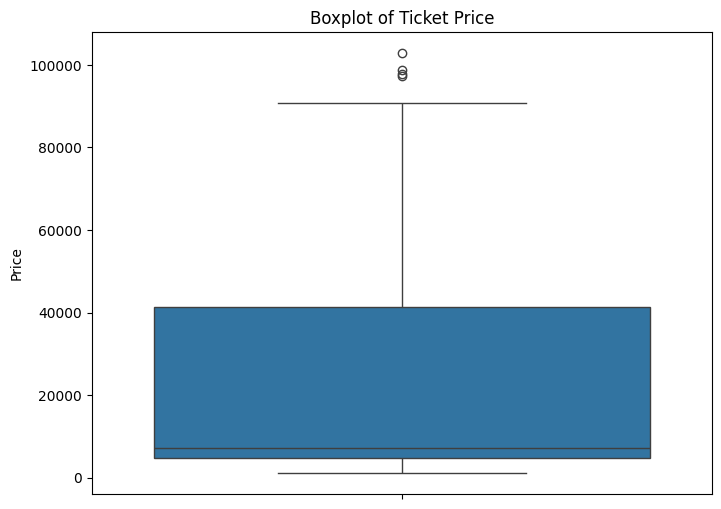

In [29]:
#Boxplot for Price

plt.figure(figsize=(8,6))
sns.boxplot(y=data['price'])
plt.title("Boxplot of Ticket Price")
plt.ylabel("Price")
plt.show()

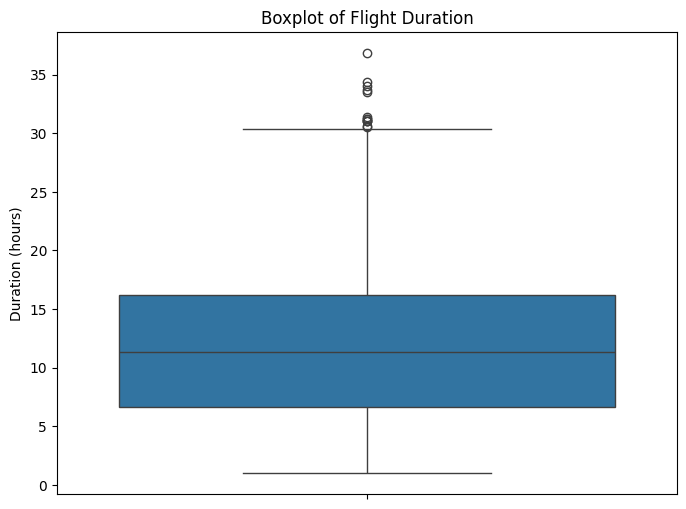

In [30]:
#Boxplot for Duration
plt.figure(figsize=(8,6))
sns.boxplot(y=data['duration'])
plt.title("Boxplot of Flight Duration")
plt.ylabel("Duration (hours)")
plt.show()

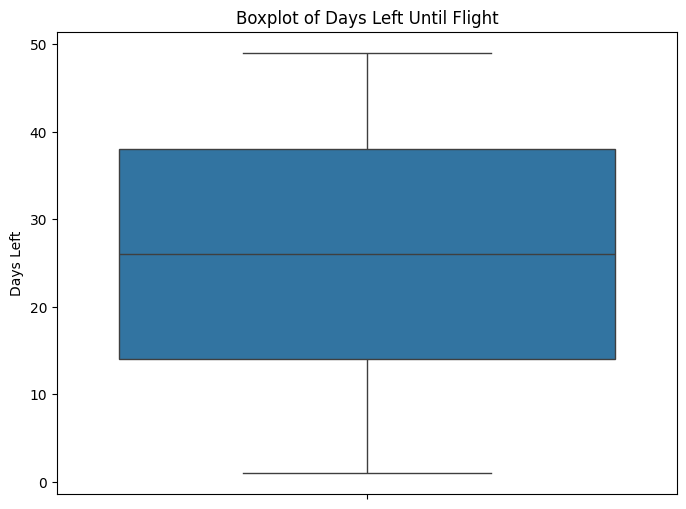

In [31]:
#Boxplot for Days Left
plt.figure(figsize=(8,6))
sns.boxplot(y=data['days_left'])
plt.title("Boxplot of Days Left Until Flight")
plt.ylabel("Days Left")
plt.show()

In [32]:
#Calculate Outliers Using IQR Method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [33]:
outliers_price = detect_outliers(data, 'price')
print("Outliers in Price:")
print(outliers_price[['price', 'airline', 'class']])

outliers_duration = detect_outliers(data, 'duration')
print("\nOutliers in Duration:")
print(outliers_duration[['duration', 'source_city', 'destination_city']])

Outliers in Price:
       price  airline     class
610    97199  Vistara  Business
753    98839  Vistara  Business
1257   97709  Vistara  Business
1437  102832  Vistara  Business

Outliers in Duration:
      duration source_city destination_city
77       31.08     Chennai          Kolkata
135      36.83   Bangalore          Chennai
246      34.00     Chennai        Bangalore
266      31.42   Bangalore           Mumbai
282      33.50     Chennai            Delhi
454      30.50   Bangalore        Hyderabad
678      31.08     Chennai          Kolkata
836      31.00     Chennai        Bangalore
962      33.67     Kolkata          Chennai
1649     31.25   Bangalore           Mumbai
1838     30.58       Delhi          Chennai
1942     31.17   Bangalore          Chennai
1965     34.33   Bangalore          Chennai


In [34]:
#Remove Outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

In [35]:
#Remove outliers from price and duration:
df_cleaned = remove_outliers(data, 'price')
df_cleaned = remove_outliers(df_cleaned, 'duration')

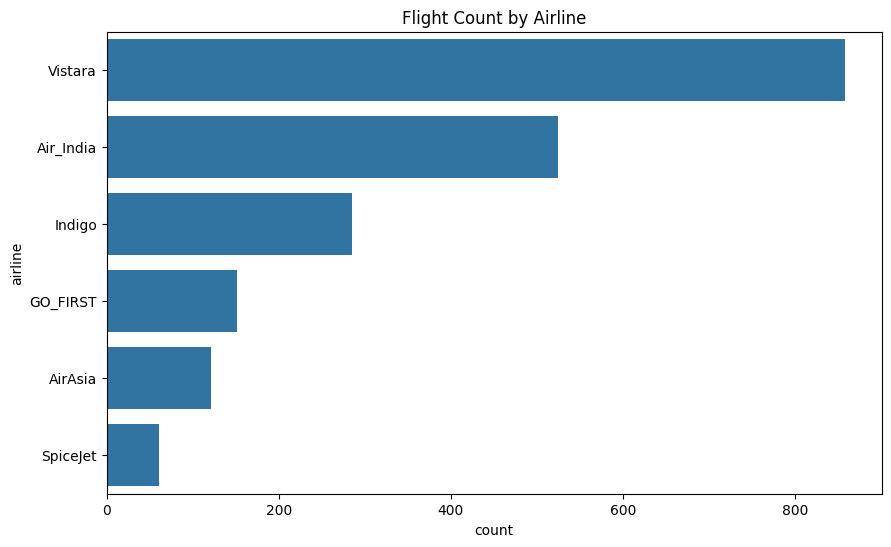

In [36]:
#Categorical Feature Analysis
#Airlines
plt.figure(figsize=(10,6))
sns.countplot(data=data, y='airline', order=data['airline'].value_counts().index)
plt.title("Flight Count by Airline")
plt.show()

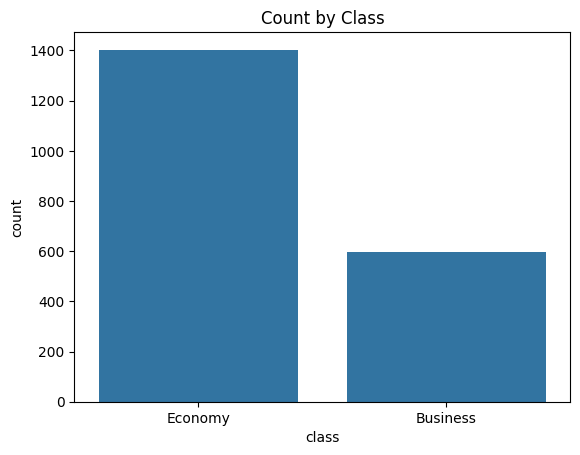

In [37]:
#Class
sns.countplot(data=data, x='class')
plt.title("Count by Class")
plt.show()

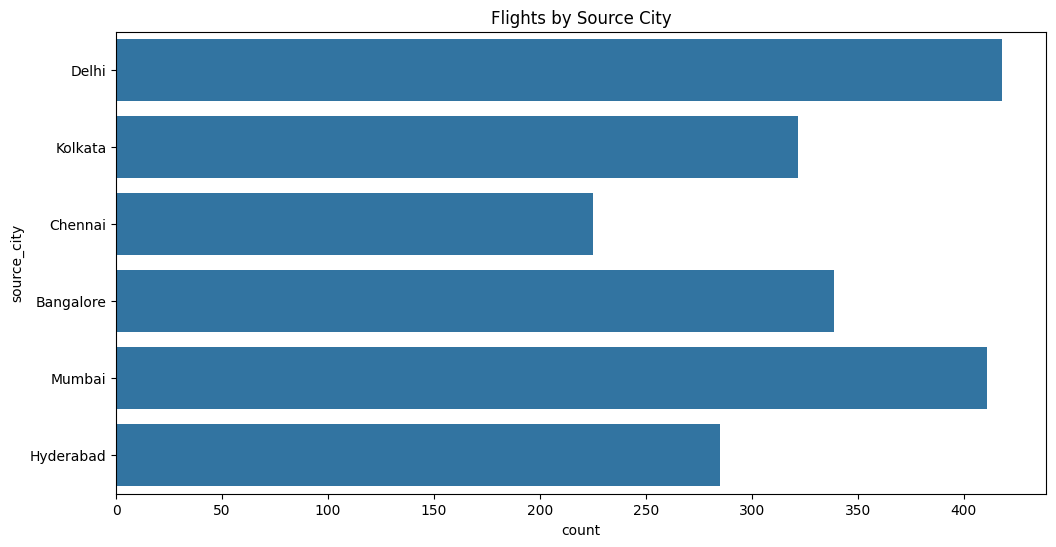

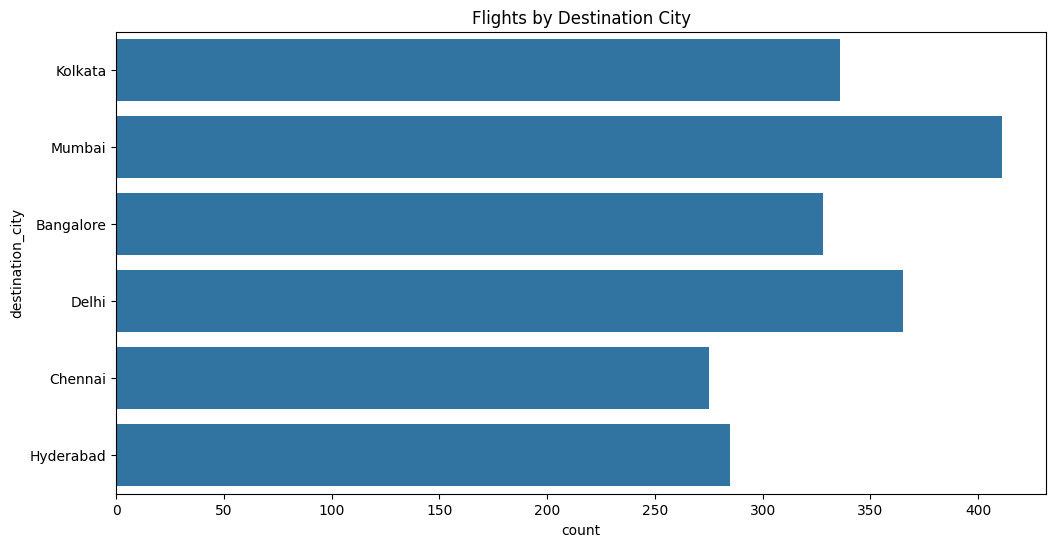

In [38]:
#Source and Destination Cities
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='source_city')
plt.title("Flights by Source City")
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='destination_city')
plt.title("Flights by Destination City")
plt.show()

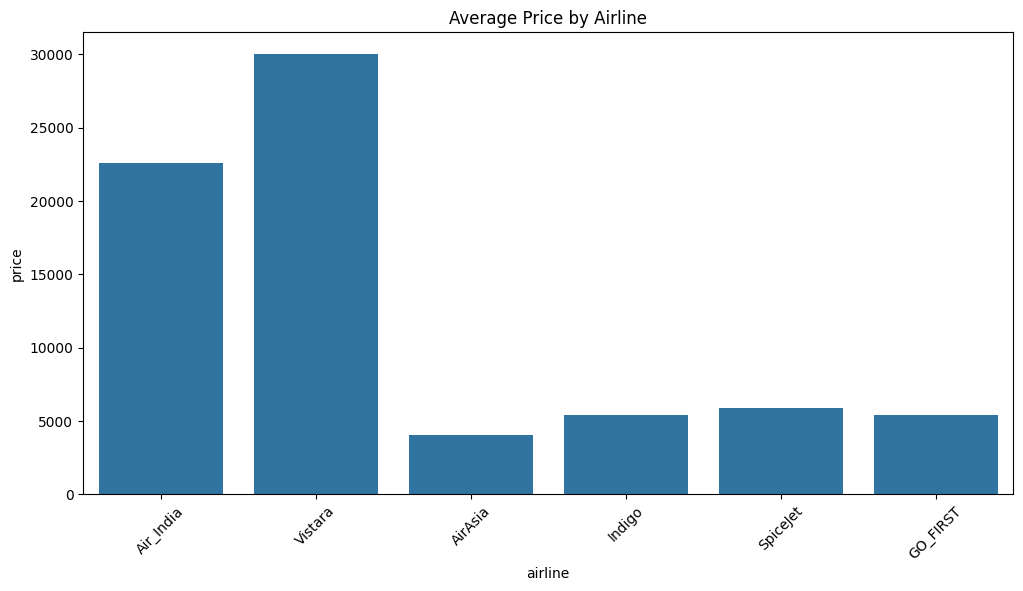

In [39]:
import numpy as np
#Relationship Between Variables
#Price vs Airline
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='airline', y='price', estimator=np.mean,errorbar=None)
plt.xticks(rotation=45)
plt.title("Average Price by Airline")
plt.show()

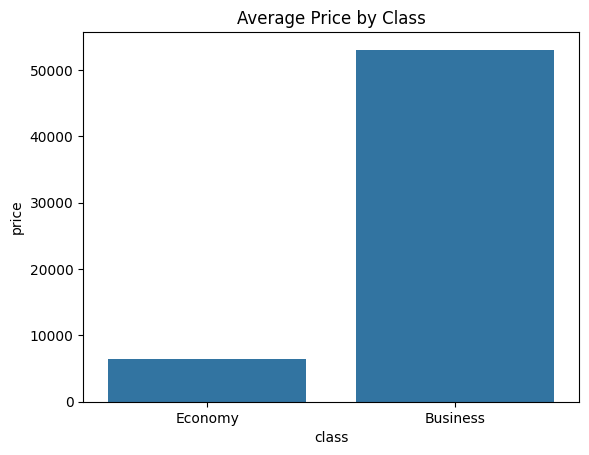

In [40]:
#Price vs Class
sns.barplot(data=data, x='class', y='price', errorbar=None)
plt.title("Average Price by Class")
plt.show()

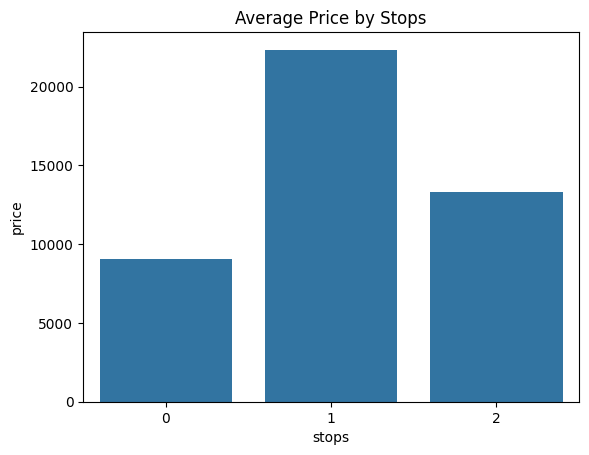

In [41]:
# Price vs Stops
sns.barplot(data=data, x='stops', y='price',errorbar=None)
plt.title("Average Price by Stops")
plt.show()

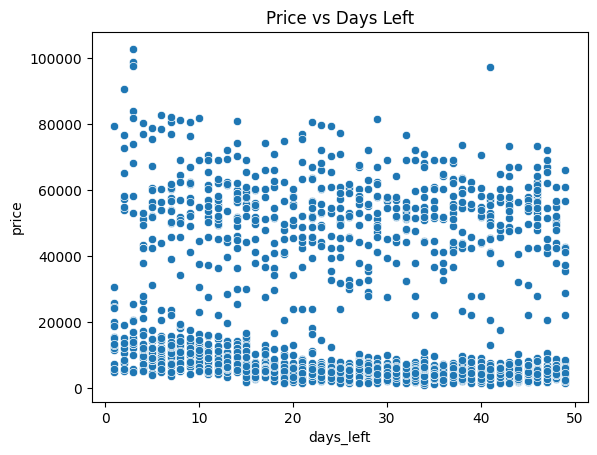

In [42]:
#Price vs Days Left
sns.scatterplot(data=data, x='days_left', y='price')
plt.title("Price vs Days Left")
plt.show()

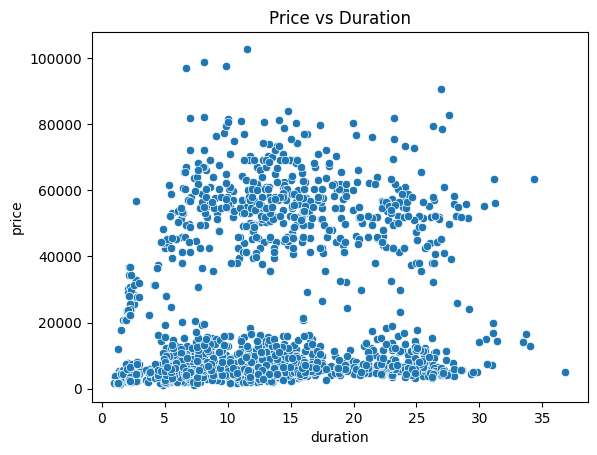

In [43]:
#Duration vs Price
sns.scatterplot(data=data, x='duration', y='price')
plt.title("Price vs Duration")
plt.show()

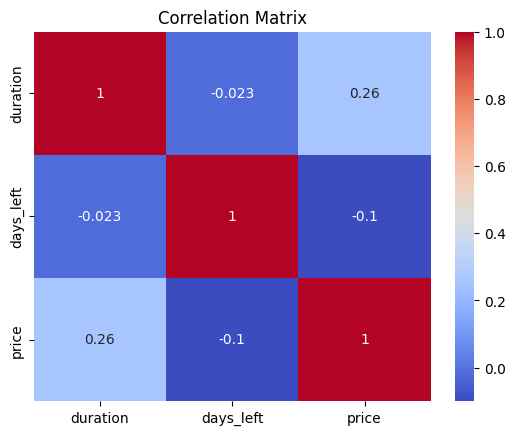

In [44]:
#Correlation Matrix
corr = data[['duration', 'days_left', 'price']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

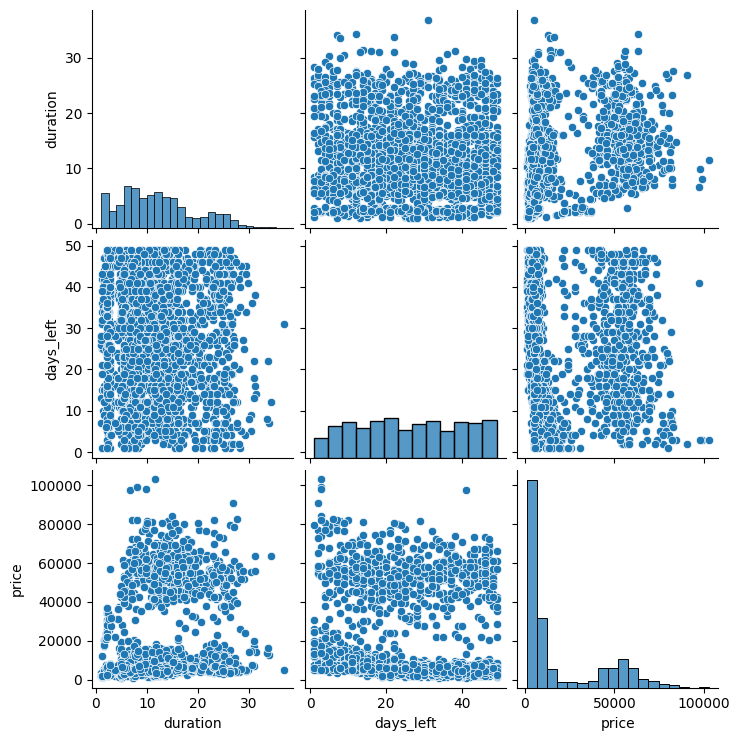

In [45]:
#Pairwise Relationships (Optional)
sns.pairplot(data[['duration', 'days_left', 'price']])
plt.show()

<ipython-input-46-1ca8a0487b54>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='source_city', data=data, palette=pal)


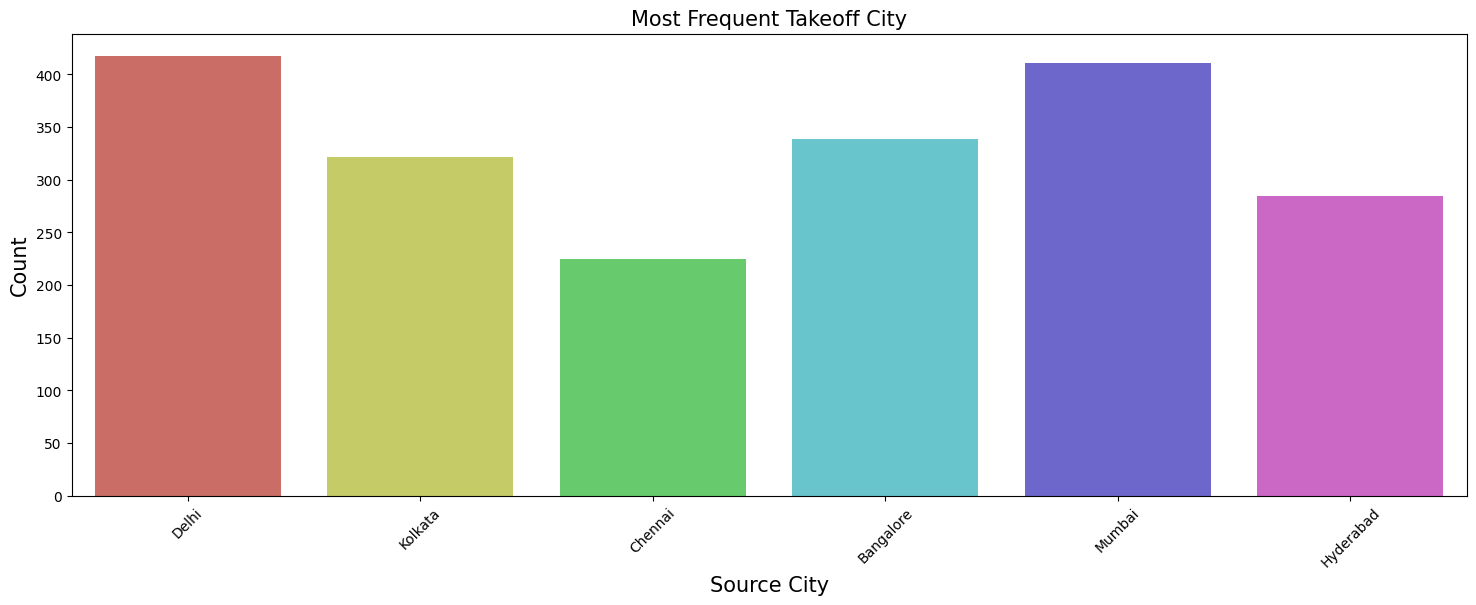

In [46]:
plt.figure(figsize=(18,6))

# Generate a custom color palette with as many colors as unique source cities
pal = sns.color_palette("hls", n_colors=len(data['source_city'].unique()))

# Create the countplot with custom colors
sns.countplot(x='source_city', data=data, palette=pal)

# Add labels and title
plt.title('Most Frequent Takeoff City', fontsize=15)
plt.xlabel('Source City', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=45)

# Show the plot
plt.show()

<ipython-input-47-6a30745928a5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['departure_time'], palette=pal)


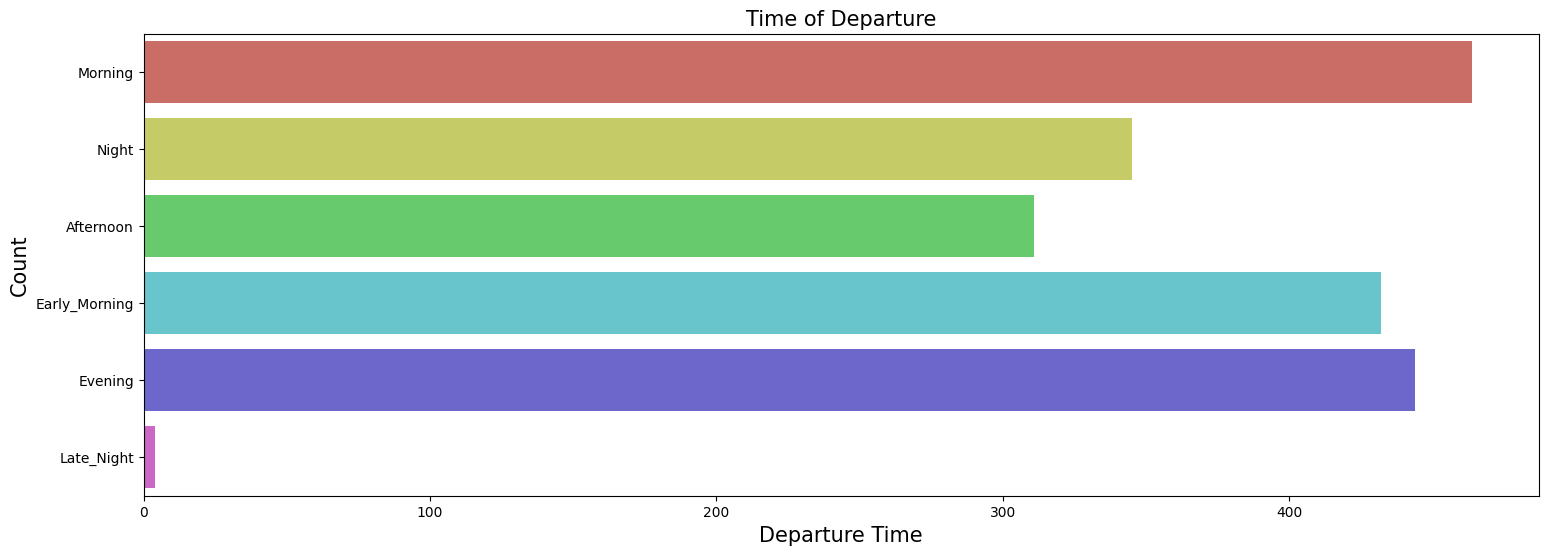

In [47]:
plt.figure(figsize=(18,6))
# Generate a custom color palette with as many colors as unique source cities
pal = sns.color_palette("hls", n_colors=len(data['departure_time'].unique()))
sns.countplot(data['departure_time'], palette=pal)
plt.title('Time of Departure',fontsize=15)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

<ipython-input-48-b17647d76b55>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['arrival_time'], palette=pal)


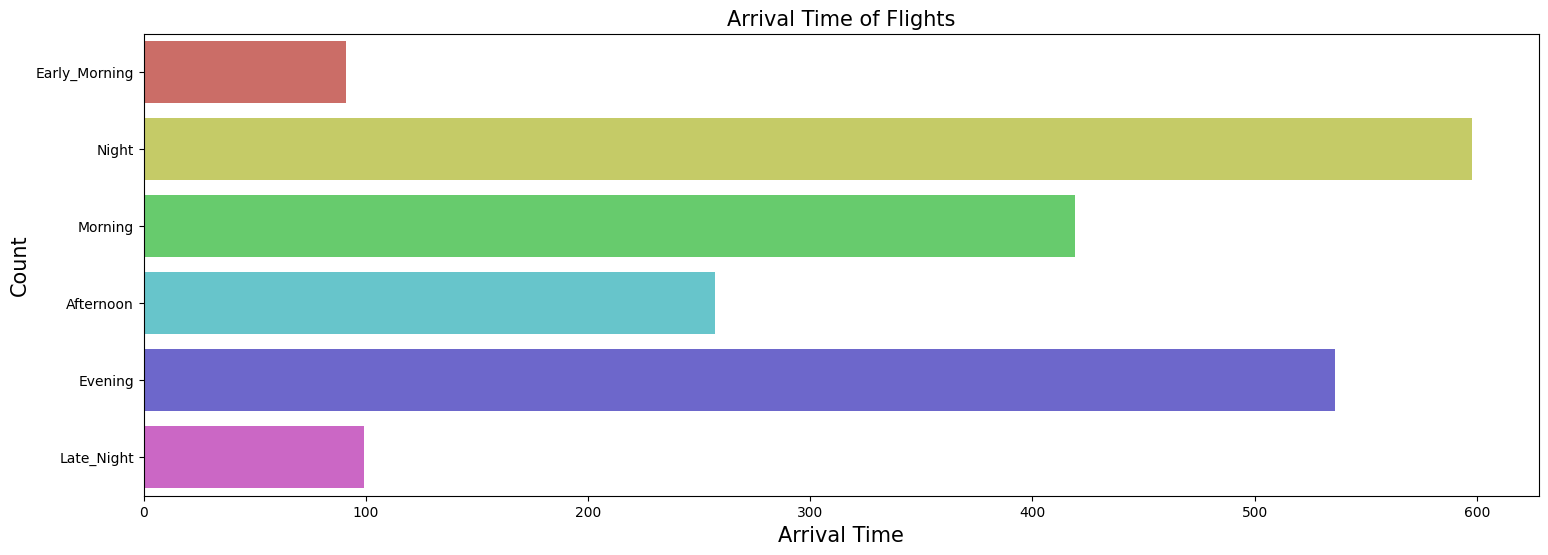

In [48]:
plt.figure(figsize=(18,6))
sns.countplot(data['arrival_time'], palette=pal)
plt.title('Arrival Time of Flights',fontsize=15)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

<ipython-input-55-bd29f610f7e6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['destination_city'],palette='viridis')


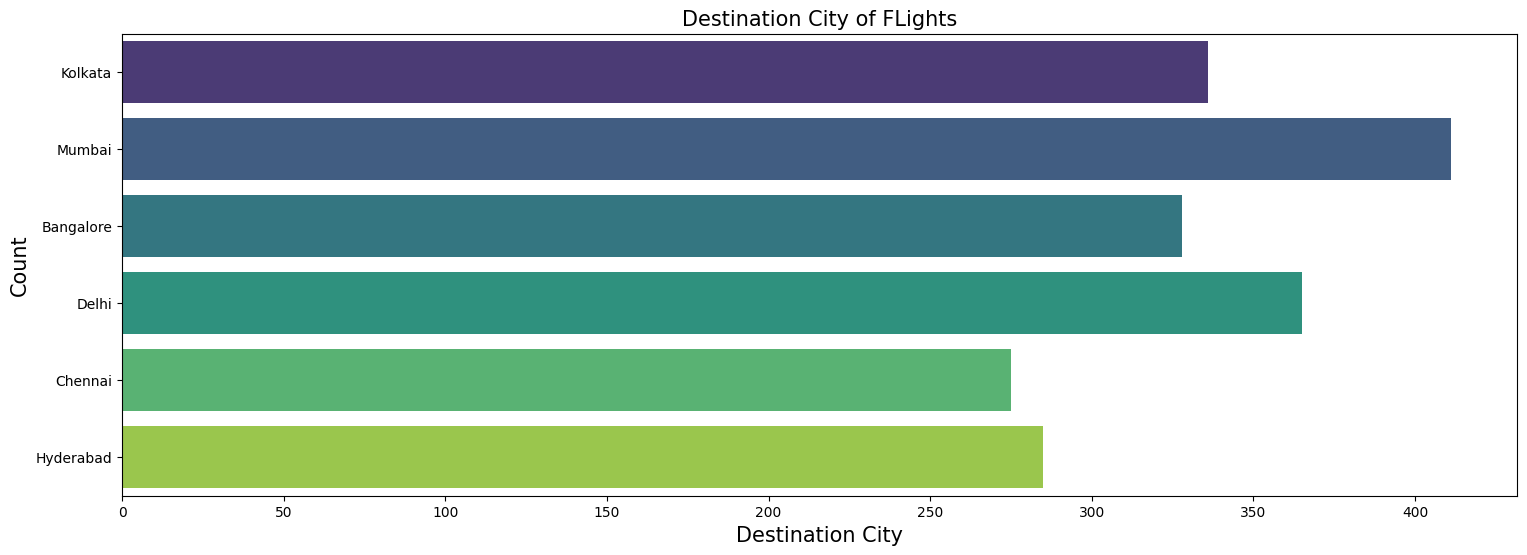

In [55]:
plt.figure(figsize=(18,6))
sns.countplot(data['destination_city'],palette='viridis')
plt.title('Destination City of FLights',fontsize=15)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

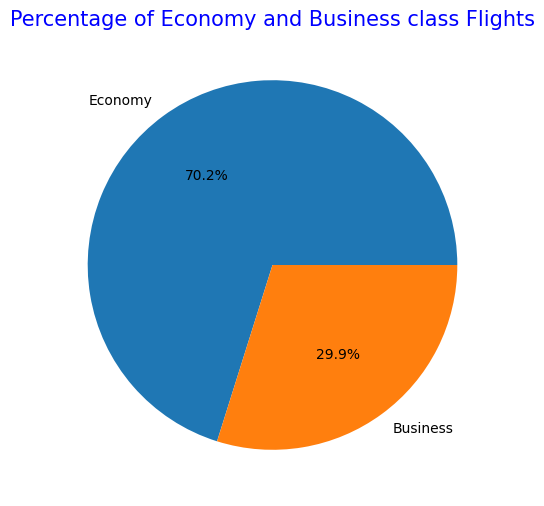

In [50]:
plt.figure(figsize =(10,6))
plt.title('Percentage of Economy and Business class Flights', fontsize=15, color='Blue')
data['class'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.show()

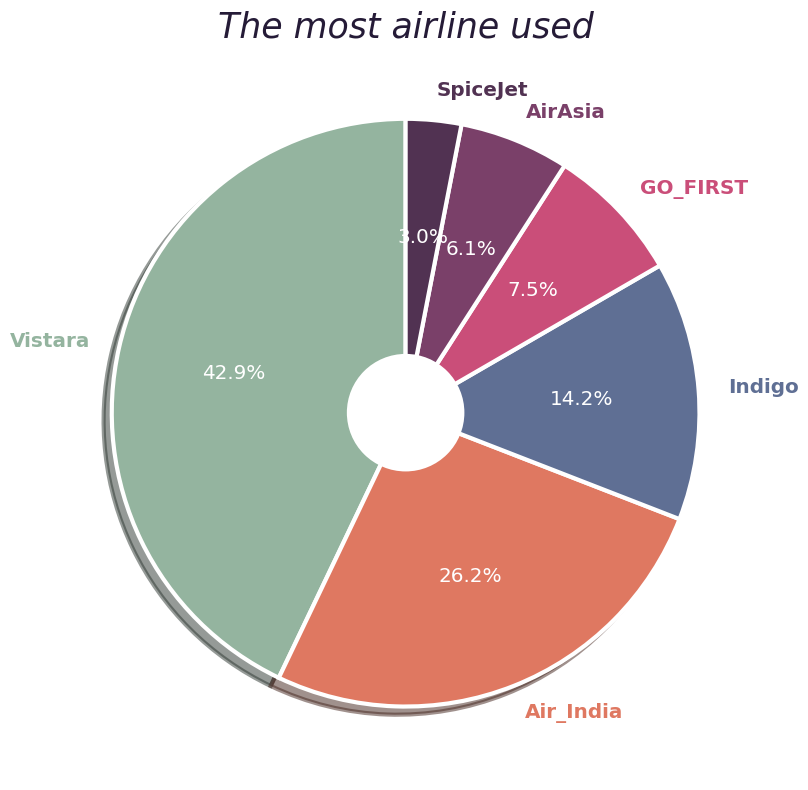

In [51]:
fig, ax = plt.subplots(figsize=(15, 8))
colors=['#94B49F','#DF7861','#5F6F94','#CA4E79','#7A4069','#513252']
colors2=['#A1C298','#C6EBC5','#FBF2C','#FFA7070','#DF7861','#F5C7A9']
patches, texts, pcts = ax.pie(
    data.airline.value_counts(), labels=[*data.airline.value_counts().index],shadow=True, autopct='%.1f%%',colors=colors,
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90)

for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
centre_circle = plt.Circle((0,0),0.20,fc='white')
plt.gcf().gca().add_artist(centre_circle)
plt.tight_layout()
plt.title(label='The most airline used',fontsize=25,color='#251B37',fontstyle='italic')
plt.tight_layout()

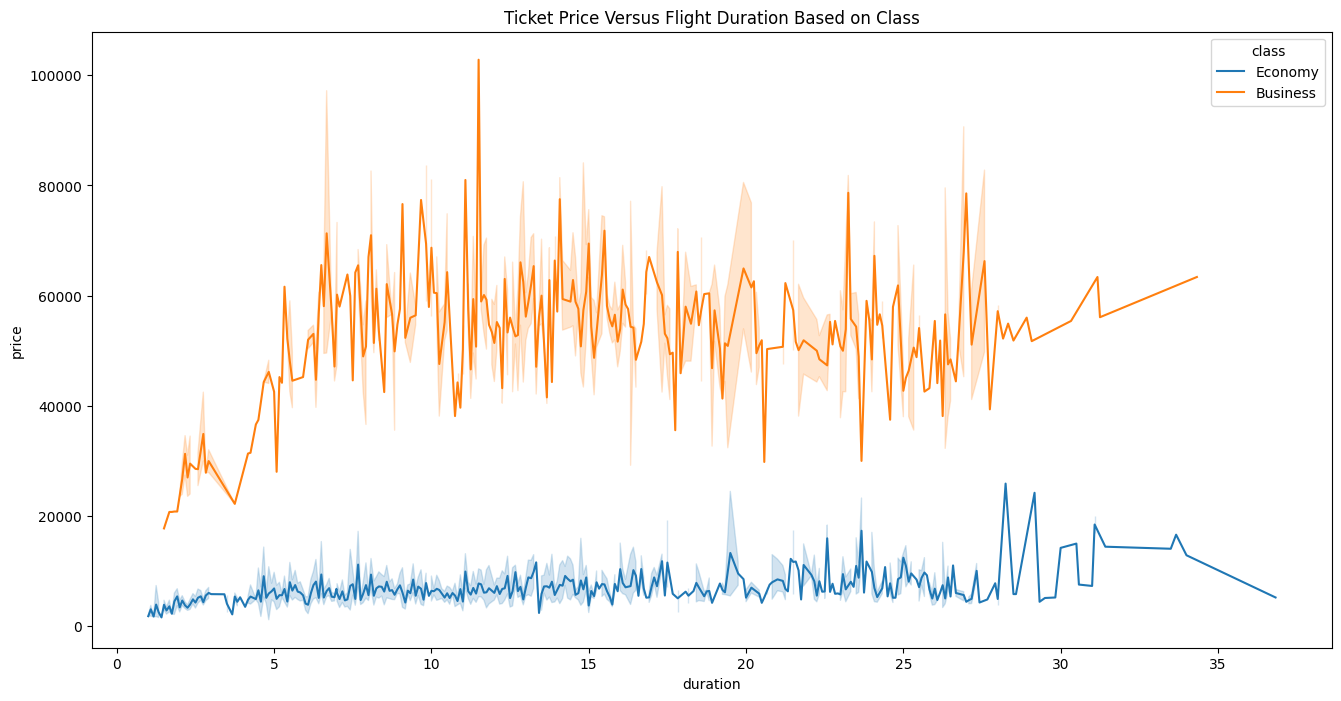

In [52]:
plt.figure(figsize = (16, 8))
sns.lineplot(data = data, x = 'duration', y= 'price', hue = 'class')
plt.title('Ticket Price Versus Flight Duration Based on Class')
plt.show()

In [ ]:
# ÿßŸÑÿ±ÿ≥ŸÖ ÿßŸÑÿ®ŸäÿßŸÜŸä ÿßŸÑÿÆÿ∑Ÿä (Price Versus Days Left)

# ÿßŸÑŸÖÿ≠Ÿàÿ± ÿßŸÑÿ£ŸÅŸÇŸä (x-axis): ŸäŸÖÿ´ŸÑ Ÿáÿ∞ÿß ÿßŸÑŸÖÿ≠Ÿàÿ± ÿπÿØÿØ ÿßŸÑÿ£ŸäÿßŸÖ ÿßŸÑŸÖÿ™ÿ®ŸÇŸäÿ© ÿ≠ÿ™Ÿâ ÿ™ÿßÿ±ŸäÿÆ ÿßŸÑÿ±ÿ≠ŸÑÿ© (days_left). ŸÉŸÑŸÖÿß ÿßÿ™ÿ¨ŸáŸÜÿß ŸÜÿ≠Ÿà ÿßŸÑŸäŸÖŸäŸÜ ÿπŸÑŸâ Ÿáÿ∞ÿß ÿßŸÑŸÖÿ≠Ÿàÿ±ÿå ÿ≤ÿßÿØ ÿπÿØÿØ ÿßŸÑÿ£ŸäÿßŸÖ ÿßŸÑŸÖÿ™ÿ®ŸÇŸäÿ©.
# ÿßŸÑŸÖÿ≠Ÿàÿ± ÿßŸÑÿ±ÿ£ÿ≥Ÿä (y-axis): ŸäŸÖÿ´ŸÑ Ÿáÿ∞ÿß ÿßŸÑŸÖÿ≠Ÿàÿ± ÿ≥ÿπÿ± ÿ™ÿ∞ŸÉÿ±ÿ© ÿßŸÑÿ∑Ÿäÿ±ÿßŸÜ (price). ŸÉŸÑŸÖÿß ÿßÿ™ÿ¨ŸáŸÜÿß ŸÑŸÑÿ£ÿπŸÑŸâ ÿπŸÑŸâ Ÿáÿ∞ÿß ÿßŸÑŸÖÿ≠Ÿàÿ±ÿå ÿßÿ±ÿ™ŸÅÿπ ÿ≥ÿπÿ± ÿßŸÑÿ™ÿ∞ŸÉÿ±ÿ©.
# ÿßŸÑÿÆÿ∑ ÿßŸÑÿ£ÿ≤ÿ±ŸÇ: ŸäŸÖÿ´ŸÑ Ÿáÿ∞ÿß ÿßŸÑÿÆÿ∑ ŸÖÿ™Ÿàÿ≥ÿ∑ ÿ≥ÿπÿ± ÿßŸÑÿ™ÿ∞ŸÉÿ±ÿ© ŸÑŸÉŸÑ ÿπÿØÿØ ŸÖÿπŸäŸÜ ŸÖŸÜ ÿßŸÑÿ£ŸäÿßŸÖ ÿßŸÑŸÖÿ™ÿ®ŸÇŸäÿ© ŸÇÿ®ŸÑ ÿßŸÑÿ±ÿ≠ŸÑÿ©.
# ÿßŸÑŸÖŸÜÿ∑ŸÇÿ© ÿßŸÑŸÖÿ∏ŸÑŸÑÿ© ÿ≠ŸàŸÑ ÿßŸÑÿÆÿ∑ ÿßŸÑÿ£ÿ≤ÿ±ŸÇ: ÿ™ŸÖÿ´ŸÑ Ÿáÿ∞Ÿá ÿßŸÑŸÖŸÜÿ∑ŸÇÿ© ŸÅÿßÿµŸÑ ÿßŸÑÿ´ŸÇÿ© (confidence interval) ŸÑŸÖÿ™Ÿàÿ≥ÿ∑ ÿßŸÑÿ≥ÿπÿ±. ÿ®ÿπÿ®ÿßÿ±ÿ© ÿ£ÿÆÿ±Ÿâÿå ÿ•ŸÜŸáÿß ÿ™ÿπÿ∑Ÿä ŸÜÿ∑ÿßŸÇŸãÿß ŸÖŸÜ ÿßŸÑŸÇŸäŸÖ ÿßŸÑÿ™Ÿä ŸÖŸÜ ÿßŸÑŸÖÿ±ÿ¨ÿ≠ ÿ£ŸÜ ŸäŸÇÿπ ŸÅŸäŸáÿß ŸÖÿ™Ÿàÿ≥ÿ∑ ÿßŸÑÿ≥ÿπÿ± ÿßŸÑÿ≠ŸÇŸäŸÇŸäÿå ŸÖÿπ ÿØÿ±ÿ¨ÿ© ŸÖÿπŸäŸÜÿ© ŸÖŸÜ ÿßŸÑÿ´ŸÇÿ©. ŸÉŸÑŸÖÿß ŸÉÿßŸÜÿ™ Ÿáÿ∞Ÿá ÿßŸÑŸÖŸÜÿ∑ŸÇÿ© ÿ£ÿ∂ŸäŸÇÿå ŸÉÿßŸÜÿ™ ÿ™ŸÇÿØŸäÿ±ÿßÿ™ ŸÖÿ™Ÿàÿ≥ÿ∑ ÿßŸÑÿ≥ÿπÿ± ÿ£ŸÉÿ´ÿ± ÿØŸÇÿ©.
# ŸÉŸäŸÅŸäÿ© ŸÇÿ±ÿßÿ°ÿ© ÿßŸÑÿ±ÿ≥ŸÖ ÿßŸÑÿ®ŸäÿßŸÜŸä:

# ÿ®ÿ¥ŸÉŸÑ ÿπÿßŸÖÿå ŸäŸÖŸÉŸÜŸÉ ŸÇÿ±ÿßÿ°ÿ© ÿßŸÑÿ±ÿ≥ŸÖ ÿßŸÑÿ®ŸäÿßŸÜŸä ŸÖŸÜ ÿßŸÑŸäÿ≥ÿßÿ± ÿ•ŸÑŸâ ÿßŸÑŸäŸÖŸäŸÜ ŸÑŸÅŸáŸÖ ŸÉŸäŸÅ Ÿäÿ™ÿ∫Ÿäÿ± ŸÖÿ™Ÿàÿ≥ÿ∑ ÿ≥ÿπÿ± ÿßŸÑÿ™ÿ∞ŸÉÿ±ÿ© ŸÖÿπ ÿ™ÿ∫Ÿäÿ± ÿπÿØÿØ ÿßŸÑÿ£ŸäÿßŸÖ ÿßŸÑŸÖÿ™ÿ®ŸÇŸäÿ© ŸÇÿ®ŸÑ ÿßŸÑÿ±ÿ≠ŸÑÿ©.

# ŸÅŸä ÿ®ÿØÿßŸäÿ© ÿßŸÑÿ±ÿ≥ŸÖ (ÿπÿØÿØ ŸÇŸÑŸäŸÑ ŸÖŸÜ ÿßŸÑÿ£ŸäÿßŸÖ ÿßŸÑŸÖÿ™ÿ®ŸÇŸäÿ©): ÿßŸÜÿ∏ÿ± ÿ•ŸÑŸâ ÿßŸÑŸÜŸÇÿ∑ÿ© ÿßŸÑÿ™Ÿä Ÿäÿ®ÿØÿ£ ÿπŸÜÿØŸáÿß ÿßŸÑÿÆÿ∑ ÿßŸÑÿ£ÿ≤ÿ±ŸÇ ÿπŸÑŸâ ÿßŸÑŸäÿ≥ÿßÿ±. Ÿáÿ∞Ÿá ÿßŸÑŸÜŸÇÿ∑ÿ© ÿ™ŸÖÿ´ŸÑ ŸÖÿ™Ÿàÿ≥ÿ∑ ÿ≥ÿπÿ± ÿßŸÑÿ™ÿ∞ÿßŸÉÿ± ÿßŸÑÿ™Ÿä ÿ™ŸÖ ÿ¥ÿ±ÿßÿ§Ÿáÿß ŸÇÿ®ŸÑ ŸàŸÇÿ™ ŸÇÿµŸäÿ± ÿ¨ÿØŸãÿß ŸÖŸÜ ÿ™ÿßÿ±ŸäÿÆ ÿßŸÑÿ±ÿ≠ŸÑÿ©.
# ŸÖÿπ ÿ≤ŸäÿßÿØÿ© ÿπÿØÿØ ÿßŸÑÿ£ŸäÿßŸÖ ÿßŸÑŸÖÿ™ÿ®ŸÇŸäÿ©: ÿ™ÿ™ÿ®ÿπ ŸÖÿ≥ÿßÿ± ÿßŸÑÿÆÿ∑ ÿßŸÑÿ£ÿ≤ÿ±ŸÇ ŸÉŸÑŸÖÿß ÿßŸÜÿ™ŸÇŸÑÿ™ ŸÜÿ≠Ÿà ÿßŸÑŸäŸÖŸäŸÜ ÿπŸÑŸâ ÿßŸÑŸÖÿ≠Ÿàÿ± ÿßŸÑÿ£ŸÅŸÇŸä.
# ÿ•ÿ∞ÿß ŸÉÿßŸÜ ÿßŸÑÿÆÿ∑ Ÿäÿ™ÿ¨Ÿá ŸÑŸÑÿ£ÿπŸÑŸâÿå ŸÅŸáÿ∞ÿß ŸäÿπŸÜŸä ÿ£ŸÜ ŸÖÿ™Ÿàÿ≥ÿ∑ ÿ≥ÿπÿ± ÿßŸÑÿ™ÿ∞ÿßŸÉÿ± ŸäŸÖŸäŸÑ ÿ•ŸÑŸâ ÿßŸÑÿßÿ±ÿ™ŸÅÿßÿπ ŸÖÿπ ÿ≤ŸäÿßÿØÿ© ÿπÿØÿØ ÿßŸÑÿ£ŸäÿßŸÖ ÿßŸÑŸÖÿ™ÿ®ŸÇŸäÿ©.
# ÿ•ÿ∞ÿß ŸÉÿßŸÜ ÿßŸÑÿÆÿ∑ Ÿäÿ™ÿ¨Ÿá ŸÑŸÑÿ£ÿ≥ŸÅŸÑÿå ŸÅŸáÿ∞ÿß ŸäÿπŸÜŸä ÿ£ŸÜ ŸÖÿ™Ÿàÿ≥ÿ∑ ÿ≥ÿπÿ± ÿßŸÑÿ™ÿ∞ÿßŸÉÿ± ŸäŸÖŸäŸÑ ÿ•ŸÑŸâ ÿßŸÑÿßŸÜÿÆŸÅÿßÿ∂ ŸÖÿπ ÿ≤ŸäÿßÿØÿ© ÿπÿØÿØ ÿßŸÑÿ£ŸäÿßŸÖ ÿßŸÑŸÖÿ™ÿ®ŸÇŸäÿ©.
# ÿ•ÿ∞ÿß ŸÉÿßŸÜ ÿßŸÑÿÆÿ∑ ŸÖÿ≥ÿ™ŸÇŸäŸÖŸãÿß ÿ™ŸÇÿ±Ÿäÿ®Ÿãÿßÿå ŸÅŸáÿ∞ÿß ŸäÿπŸÜŸä ÿ£ŸÜ ŸÖÿ™Ÿàÿ≥ÿ∑ ÿßŸÑÿ≥ÿπÿ± ŸÑÿß Ÿäÿ™ÿ∫Ÿäÿ± ÿ®ÿ¥ŸÉŸÑ ŸÉÿ®Ÿäÿ± ŸÖÿπ ÿπÿØÿØ ÿßŸÑÿ£ŸäÿßŸÖ ÿßŸÑŸÖÿ™ÿ®ŸÇŸäÿ©.
# ŸÖÿß ŸäŸÖŸÉŸÜ ÿßÿ≥ÿ™ŸÜÿ™ÿßÿ¨Ÿá ŸÖŸÜ Ÿáÿ∞ÿß ÿßŸÑÿ±ÿ≥ŸÖ ÿßŸÑÿ®ŸäÿßŸÜŸä:

# ŸÖŸÜ ÿÆŸÑÿßŸÑ ŸÖŸÑÿßÿ≠ÿ∏ÿ© ÿ¥ŸÉŸÑ ÿßŸÑÿÆÿ∑ Ÿàÿßÿ™ÿ¨ÿßŸáŸáÿå ŸäŸÖŸÉŸÜŸÉ ÿßÿ≥ÿ™ÿÆŸÑÿßÿµ ÿßÿ≥ÿ™ŸÜÿ™ÿßÿ¨ÿßÿ™ ÿ≠ŸàŸÑ ÿßŸÑÿπŸÑÿßŸÇÿ© ÿ®ŸäŸÜ ÿßŸÑŸàŸÇÿ™ ÿßŸÑÿ∞Ÿä ÿ™ÿ≠ÿ¨ÿ≤ ŸÅŸäŸá ÿ™ÿ∞ŸÉÿ±ÿ™ŸÉ Ÿàÿ≥ÿπÿ±Ÿáÿß. ÿπŸÑŸâ ÿ≥ÿ®ŸäŸÑ ÿßŸÑŸÖÿ´ÿßŸÑÿå ÿ•ÿ∞ÿß ÿ±ÿ£Ÿäÿ™ ÿ£ŸÜ ÿßŸÑÿÆÿ∑ Ÿäÿ™ÿ¨Ÿá ŸÑŸÑÿ£ÿ≥ŸÅŸÑ ÿ®ÿ¥ŸÉŸÑ ŸÖŸÑÿ≠Ÿàÿ∏ ÿπŸÜÿØŸÖÿß ŸäŸÉŸàŸÜ ÿπÿØÿØ ÿßŸÑÿ£ŸäÿßŸÖ ÿßŸÑŸÖÿ™ÿ®ŸÇŸäÿ© ŸÉÿ®Ÿäÿ±Ÿãÿßÿå ŸÅŸáÿ∞ÿß ŸÇÿØ Ÿäÿ¥Ÿäÿ± ÿ•ŸÑŸâ ÿ£ŸÜ ÿßŸÑÿ≠ÿ¨ÿ≤ ŸÖÿ®ŸÉÿ±Ÿãÿß ŸÇÿØ Ÿäÿ§ÿØŸä ÿ•ŸÑŸâ ÿ£ÿ≥ÿπÿßÿ± ÿ£ŸÇŸÑ. ÿ•ÿ∞ÿß ÿ±ÿ£Ÿäÿ™ ÿ£ŸÜ ÿßŸÑÿÆÿ∑ Ÿäÿ±ÿ™ŸÅÿπ ÿ®ÿ¥ŸÉŸÑ ÿ≠ÿßÿØ ÿπŸÜÿØŸÖÿß ŸäŸÉŸàŸÜ ÿπÿØÿØ ÿßŸÑÿ£ŸäÿßŸÖ ÿßŸÑŸÖÿ™ÿ®ŸÇŸäÿ© ÿµÿ∫Ÿäÿ±Ÿãÿßÿå ŸÅŸáÿ∞ÿß ŸÇÿØ Ÿäÿ¥Ÿäÿ± ÿ•ŸÑŸâ ÿ£ŸÜ ÿßŸÑÿ≠ÿ¨ÿ≤ ŸÅŸä ÿßŸÑŸÑÿ≠ÿ∏ÿ© ÿßŸÑÿ£ÿÆŸäÿ±ÿ© ŸÇÿØ ŸäŸÉŸàŸÜ ÿ£ÿ∫ŸÑŸâ.

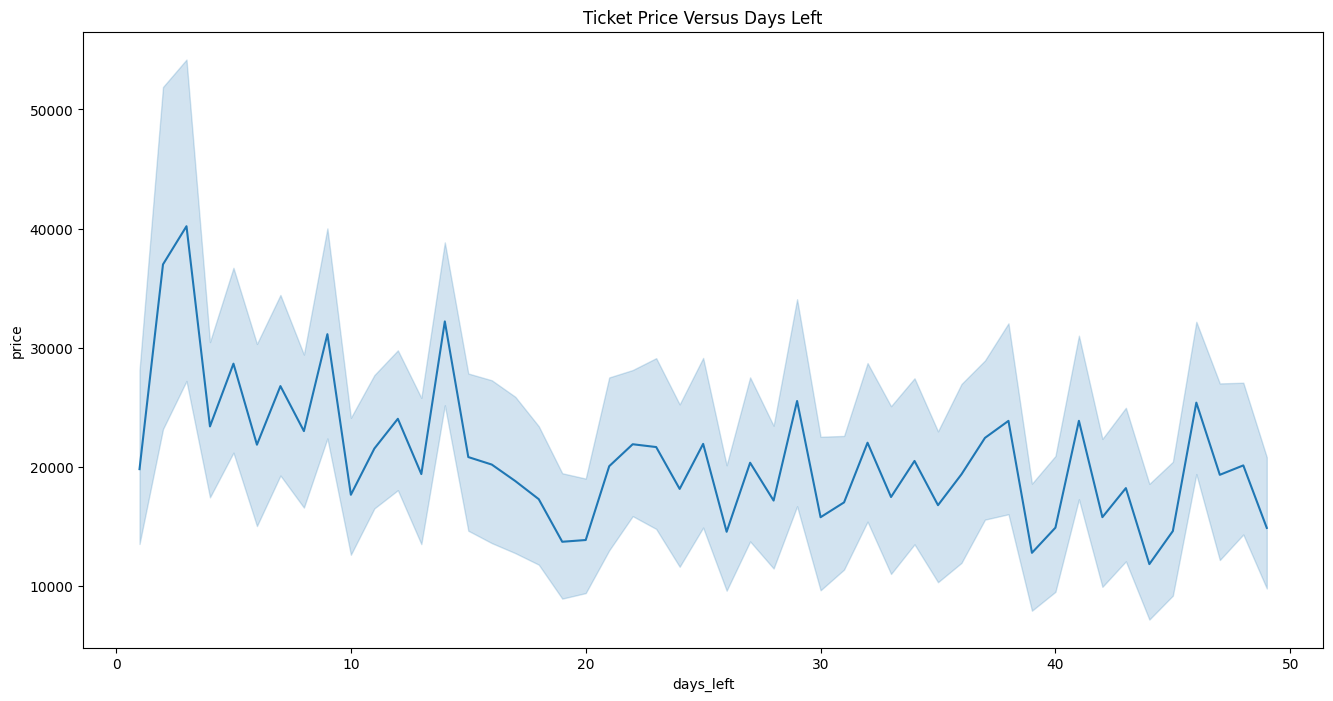

In [53]:
plt.figure(figsize = (16, 8))
sns.lineplot(data = data, x = 'days_left', y= 'price')
plt.title('Ticket Price Versus Days Left')
plt.show()

In [ ]:
# ÿßŸÑÿ±ÿ≥ŸÖ ÿßŸÑÿ®ŸäÿßŸÜŸä ÿßŸÑÿÆÿ∑Ÿä (Ticket Price Versus Days Left)

# Ÿáÿ∞ÿß ÿßŸÑÿ±ÿ≥ŸÖ ÿßŸÑÿ®ŸäÿßŸÜŸä ŸäŸàÿ∂ÿ≠ ÿßŸÑÿπŸÑÿßŸÇÿ© ÿ®ŸäŸÜ ÿπÿØÿØ ÿßŸÑÿ£ŸäÿßŸÖ ÿßŸÑŸÖÿ™ÿ®ŸÇŸäÿ© ŸÇÿ®ŸÑ ÿßŸÑÿ±ÿ≠ŸÑÿ© (Days Left) Ÿàÿ≥ÿπÿ± ÿßŸÑÿ™ÿ∞ŸÉÿ±ÿ© (Price).

# ÿßŸÑŸÖÿ≠Ÿàÿ± ÿßŸÑÿ£ŸÅŸÇŸä (X-axis - Days Left): ŸäŸÖÿ´ŸÑ Ÿáÿ∞ÿß ÿßŸÑŸÖÿ≠Ÿàÿ± ÿπÿØÿØ ÿßŸÑÿ£ŸäÿßŸÖ ÿßŸÑŸÖÿ™ÿ®ŸÇŸäÿ© ÿ≠ÿ™Ÿâ ÿ™ÿßÿ±ŸäÿÆ ÿßŸÑÿ±ÿ≠ŸÑÿ©. ÿßŸÑŸÇŸäŸÖ ÿπŸÑŸâ Ÿáÿ∞ÿß ÿßŸÑŸÖÿ≠Ÿàÿ± ÿ™ÿ≤ÿØÿßÿØ ŸÉŸÑŸÖÿß ÿßÿ™ÿ¨ŸáŸÜÿß ŸÜÿ≠Ÿà ÿßŸÑŸäŸÖŸäŸÜÿå ŸÖŸÖÿß ŸäÿπŸÜŸä ÿ£ŸÜŸÜÿß ŸÜÿ™ÿ≠ÿ±ŸÉ ŸÖŸÜ ÿßŸÑÿ≠ÿ¨ÿ≤ ŸÅŸä ÿßŸÑŸÑÿ≠ÿ∏ÿ© ÿßŸÑÿ£ÿÆŸäÿ±ÿ© (ÿπÿØÿØ ŸÇŸÑŸäŸÑ ŸÖŸÜ ÿßŸÑÿ£ŸäÿßŸÖ ÿßŸÑŸÖÿ™ÿ®ŸÇŸäÿ©) ÿ•ŸÑŸâ ÿßŸÑÿ≠ÿ¨ÿ≤ ŸÖÿ®ŸÉÿ±Ÿãÿß (ÿπÿØÿØ ŸÉÿ®Ÿäÿ± ŸÖŸÜ ÿßŸÑÿ£ŸäÿßŸÖ ÿßŸÑŸÖÿ™ÿ®ŸÇŸäÿ©).
# ÿßŸÑŸÖÿ≠Ÿàÿ± ÿßŸÑÿ±ÿ£ÿ≥Ÿä (Y-axis - Price): ŸäŸÖÿ´ŸÑ Ÿáÿ∞ÿß ÿßŸÑŸÖÿ≠Ÿàÿ± ÿ≥ÿπÿ± ÿ™ÿ∞ŸÉÿ±ÿ© ÿßŸÑÿ∑Ÿäÿ±ÿßŸÜ. ÿßŸÑŸÇŸäŸÖ ÿπŸÑŸâ Ÿáÿ∞ÿß ÿßŸÑŸÖÿ≠Ÿàÿ± ÿ™ÿ≤ÿØÿßÿØ ŸÉŸÑŸÖÿß ÿßÿ™ÿ¨ŸáŸÜÿß ŸÑŸÑÿ£ÿπŸÑŸâÿå ŸÖŸÖÿß ŸäÿπŸÜŸä ÿ£ŸÜ ÿßŸÑÿ≥ÿπÿ± Ÿäÿ±ÿ™ŸÅÿπ.
# ÿßŸÑÿÆÿ∑ ÿßŸÑÿ£ÿ≤ÿ±ŸÇ: Ÿáÿ∞ÿß ÿßŸÑÿÆÿ∑ ŸäŸÖÿ´ŸÑ ŸÖÿ™Ÿàÿ≥ÿ∑ ÿ≥ÿπÿ± ÿ™ÿ∞ŸÉÿ±ÿ© ÿßŸÑÿ∑Ÿäÿ±ÿßŸÜ ŸÑŸÉŸÑ ÿπÿØÿØ ŸÖÿπŸäŸÜ ŸÖŸÜ ÿßŸÑÿ£ŸäÿßŸÖ ÿßŸÑŸÖÿ™ÿ®ŸÇŸäÿ© ŸÇÿ®ŸÑ ÿßŸÑÿ±ÿ≠ŸÑÿ©.
# ÿßŸÑŸÖŸÜÿ∑ŸÇÿ© ÿßŸÑŸÖÿ∏ŸÑŸÑÿ© ÿ≠ŸàŸÑ ÿßŸÑÿÆÿ∑ ÿßŸÑÿ£ÿ≤ÿ±ŸÇ: Ÿáÿ∞Ÿá ÿßŸÑŸÖŸÜÿ∑ŸÇÿ© ÿ™ŸÖÿ´ŸÑ ŸÅÿßÿµŸÑ ÿßŸÑÿ´ŸÇÿ© (confidence interval) ŸÑŸÖÿ™Ÿàÿ≥ÿ∑ ÿßŸÑÿ≥ÿπÿ±. ÿ®ÿπÿ®ÿßÿ±ÿ© ÿ£ÿÆÿ±Ÿâÿå ÿ™ÿπÿ∑ŸäŸÉ Ÿáÿ∞Ÿá ÿßŸÑŸÖŸÜÿ∑ŸÇÿ© ŸÜÿ∑ÿßŸÇŸãÿß ŸÖŸÜ ÿßŸÑŸÇŸäŸÖ ÿßŸÑÿ™Ÿä ŸÖŸÜ ÿßŸÑŸÖÿ±ÿ¨ÿ≠ ÿ£ŸÜ ŸäŸÇÿπ ŸÅŸäŸáÿß ŸÖÿ™Ÿàÿ≥ÿ∑ ÿßŸÑÿ≥ÿπÿ± ÿßŸÑÿ≠ŸÇŸäŸÇŸäÿå ŸÖÿπ ÿØÿ±ÿ¨ÿ© ŸÖÿπŸäŸÜÿ© ŸÖŸÜ ÿßŸÑÿ´ŸÇÿ© (ÿπÿßÿØÿ©Ÿã 95% ÿ®ÿ¥ŸÉŸÑ ÿßŸÅÿ™ÿ±ÿßÿ∂Ÿä ŸÅŸä ŸÖŸÉÿ™ÿ®ÿ© Seaborn). ŸÉŸÑŸÖÿß ŸÉÿßŸÜÿ™ Ÿáÿ∞Ÿá ÿßŸÑŸÖŸÜÿ∑ŸÇÿ© ÿ£ÿ∂ŸäŸÇÿå ŸÉÿßŸÜÿ™ ÿ™ŸÇÿØŸäÿ±ÿßÿ™ ŸÖÿ™Ÿàÿ≥ÿ∑ ÿßŸÑÿ≥ÿπÿ± ÿ£ŸÉÿ´ÿ± ÿØŸÇÿ©.
# ŸÉŸäŸÅŸäÿ© ŸÇÿ±ÿßÿ°ÿ© ŸàŸÅŸáŸÖ ŸÜÿ™Ÿäÿ¨ÿ© ÿßŸÑÿ±ÿ≥ŸÖ ÿßŸÑÿ®ŸäÿßŸÜŸä:

# ŸÑŸÇÿ±ÿßÿ°ÿ© Ÿáÿ∞ÿß ÿßŸÑÿ±ÿ≥ŸÖ ÿßŸÑÿ®ŸäÿßŸÜŸä ŸàŸÅŸáŸÖ ÿßŸÑŸÜÿ™Ÿäÿ¨ÿ©ÿå ÿßŸÜÿ∏ÿ± ÿ•ŸÑŸâ ŸÖÿ≥ÿßÿ± ÿßŸÑÿÆÿ∑ ÿßŸÑÿ£ÿ≤ÿ±ŸÇ ŸÖŸÜ ÿßŸÑŸäÿ≥ÿßÿ± ÿ•ŸÑŸâ ÿßŸÑŸäŸÖŸäŸÜ:

# ÿπŸÜÿØŸÖÿß ŸäŸÉŸàŸÜ ÿπÿØÿØ ÿßŸÑÿ£ŸäÿßŸÖ ÿßŸÑŸÖÿ™ÿ®ŸÇŸäÿ© ŸÇŸÑŸäŸÑŸãÿß (ÿπŸÑŸâ ÿßŸÑÿ¨ÿßŸÜÿ® ÿßŸÑÿ£Ÿäÿ≥ÿ± ŸÖŸÜ ÿßŸÑÿ±ÿ≥ŸÖ ÿßŸÑÿ®ŸäÿßŸÜŸä):

# ÿßŸÜÿ∏ÿ± ÿ•ŸÑŸâ ÿßÿ±ÿ™ŸÅÿßÿπ ÿßŸÑÿÆÿ∑ ÿßŸÑÿ£ÿ≤ÿ±ŸÇ ŸÅŸä Ÿáÿ∞Ÿá ÿßŸÑŸÖŸÜÿ∑ŸÇÿ©. Ÿáÿ∞ÿß ŸäŸÖÿ´ŸÑ ŸÖÿ™Ÿàÿ≥ÿ∑ ÿ≥ÿπÿ± ÿßŸÑÿ™ÿ∞ÿßŸÉÿ± ÿßŸÑÿ™Ÿä Ÿäÿ™ŸÖ ÿ¥ÿ±ÿßÿ§Ÿáÿß ŸÇÿ®ŸÑ ŸàŸÇÿ™ ŸÇÿµŸäÿ± ÿ¨ÿØŸãÿß ŸÖŸÜ ŸÖŸàÿπÿØ ÿßŸÑÿ±ÿ≠ŸÑÿ©.
# ÿ•ÿ∞ÿß ŸÉÿßŸÜ ÿßŸÑÿÆÿ∑ ÿπÿßŸÑŸäŸãÿß ŸÅŸä Ÿáÿ∞Ÿá ÿßŸÑŸÖŸÜÿ∑ŸÇÿ©ÿå ŸÅŸáÿ∞ÿß Ÿäÿ¥Ÿäÿ± ÿ•ŸÑŸâ ÿ£ŸÜ ÿßŸÑÿ≠ÿ¨ÿ≤ ŸÅŸä ÿßŸÑŸÑÿ≠ÿ∏ÿ© ÿßŸÑÿ£ÿÆŸäÿ±ÿ© ŸäŸÖŸäŸÑ ÿ•ŸÑŸâ ÿ£ŸÜ ŸäŸÉŸàŸÜ ŸÖŸÉŸÑŸÅŸãÿß.
# ŸÖÿπ ÿ≤ŸäÿßÿØÿ© ÿπÿØÿØ ÿßŸÑÿ£ŸäÿßŸÖ ÿßŸÑŸÖÿ™ÿ®ŸÇŸäÿ© (ÿ®ŸäŸÜ ÿßŸÑÿ¨ÿßŸÜÿ® ÿßŸÑÿ£Ÿäÿ≥ÿ± ŸàÿßŸÑÿ¨ÿßŸÜÿ® ÿßŸÑÿ£ŸäŸÖŸÜ):

# ÿ™ÿ™ÿ®ÿπ ŸÖÿ≥ÿßÿ± ÿßŸÑÿÆÿ∑ ÿßŸÑÿ£ÿ≤ÿ±ŸÇ ŸÖÿπ ÿ™ÿ≠ÿ±ŸÉŸÉ ŸÜÿ≠Ÿà ÿßŸÑŸäŸÖŸäŸÜ.
# ÿ•ÿ∞ÿß ŸÉÿßŸÜ ÿßŸÑÿÆÿ∑ ŸäŸÜÿÆŸÅÿ∂ ÿ®ÿ¥ŸÉŸÑ ŸÖŸÑÿ≠Ÿàÿ∏: Ÿáÿ∞ÿß ŸäÿπŸÜŸä ÿ£ŸÜ ŸÖÿ™Ÿàÿ≥ÿ∑ ÿ≥ÿπÿ± ÿßŸÑÿ™ÿ∞ŸÉÿ±ÿ© ŸäŸÖŸäŸÑ ÿ•ŸÑŸâ ÿßŸÑÿßŸÜÿÆŸÅÿßÿ∂ ŸÖÿπ ÿ≤ŸäÿßÿØÿ© ÿπÿØÿØ ÿßŸÑÿ£ŸäÿßŸÖ ÿßŸÑŸÖÿ™ÿ®ŸÇŸäÿ© (ÿßŸÑÿ≠ÿ¨ÿ≤ ŸÖÿ®ŸÉÿ±Ÿãÿß Ÿäÿ§ÿØŸä ÿ•ŸÑŸâ ÿ£ÿ≥ÿπÿßÿ± ÿ£ŸÇŸÑ).
# ÿ•ÿ∞ÿß ŸÉÿßŸÜ ÿßŸÑÿÆÿ∑ Ÿäÿ±ÿ™ŸÅÿπ ÿ®ÿ¥ŸÉŸÑ ŸÖŸÑÿ≠Ÿàÿ∏: Ÿáÿ∞ÿß ŸäÿπŸÜŸä ÿ£ŸÜ ŸÖÿ™Ÿàÿ≥ÿ∑ ÿ≥ÿπÿ± ÿßŸÑÿ™ÿ∞ŸÉÿ±ÿ© ŸäŸÖŸäŸÑ ÿ•ŸÑŸâ ÿßŸÑÿßÿ±ÿ™ŸÅÿßÿπ ŸÖÿπ ÿ≤ŸäÿßÿØÿ© ÿπÿØÿØ ÿßŸÑÿ£ŸäÿßŸÖ ÿßŸÑŸÖÿ™ÿ®ŸÇŸäÿ© (ÿßŸÑÿ≠ÿ¨ÿ≤ ŸÖÿ®ŸÉÿ±Ÿãÿß Ÿäÿ§ÿØŸä ÿ•ŸÑŸâ ÿ£ÿ≥ÿπÿßÿ± ÿ£ÿπŸÑŸâ).
# ÿ•ÿ∞ÿß ŸÉÿßŸÜ ÿßŸÑÿÆÿ∑ ŸÖÿ≥ÿ™ŸÇŸäŸÖŸãÿß ÿ™ŸÇÿ±Ÿäÿ®Ÿãÿß ÿ£Ÿà Ÿäÿ™ÿ∫Ÿäÿ± ŸÇŸÑŸäŸÑÿßŸã: Ÿáÿ∞ÿß ŸäÿπŸÜŸä ÿ£ŸÜ ÿßŸÑÿπŸÑÿßŸÇÿ© ÿ®ŸäŸÜ ÿßŸÑÿ£ŸäÿßŸÖ ÿßŸÑŸÖÿ™ÿ®ŸÇŸäÿ© ŸàÿßŸÑÿ≥ÿπÿ± ŸÑŸäÿ≥ÿ™ ŸÇŸàŸäÿ© ÿ¨ÿØŸãÿß ŸÅŸä Ÿáÿ∞ÿß ÿßŸÑŸÜÿ∑ÿßŸÇ.
# ÿπŸÜÿØŸÖÿß ŸäŸÉŸàŸÜ ÿπÿØÿØ ÿßŸÑÿ£ŸäÿßŸÖ ÿßŸÑŸÖÿ™ÿ®ŸÇŸäÿ© ŸÉÿ®Ÿäÿ±Ÿãÿß (ÿπŸÑŸâ ÿßŸÑÿ¨ÿßŸÜÿ® ÿßŸÑÿ£ŸäŸÖŸÜ ŸÖŸÜ ÿßŸÑÿ±ÿ≥ŸÖ ÿßŸÑÿ®ŸäÿßŸÜŸä):

# ÿßŸÜÿ∏ÿ± ÿ•ŸÑŸâ ÿßÿ±ÿ™ŸÅÿßÿπ ÿßŸÑÿÆÿ∑ ÿßŸÑÿ£ÿ≤ÿ±ŸÇ ŸÅŸä Ÿáÿ∞Ÿá ÿßŸÑŸÖŸÜÿ∑ŸÇÿ©. Ÿáÿ∞ÿß ŸäŸÖÿ´ŸÑ ŸÖÿ™Ÿàÿ≥ÿ∑ ÿ≥ÿπÿ± ÿßŸÑÿ™ÿ∞ÿßŸÉÿ± ÿßŸÑÿ™Ÿä Ÿäÿ™ŸÖ ÿ¥ÿ±ÿßÿ§Ÿáÿß ŸÇÿ®ŸÑ ŸàŸÇÿ™ ÿ∑ŸàŸäŸÑ ÿ¨ÿØŸãÿß ŸÖŸÜ ŸÖŸàÿπÿØ ÿßŸÑÿ±ÿ≠ŸÑÿ©.
# ŸÇÿßÿ±ŸÜ Ÿáÿ∞ÿß ÿßŸÑÿßÿ±ÿ™ŸÅÿßÿπ ÿ®ÿßÿ±ÿ™ŸÅÿßÿπ ÿßŸÑÿÆÿ∑ ÿπŸÑŸâ ÿßŸÑÿ¨ÿßŸÜÿ® ÿßŸÑÿ£Ÿäÿ≥ÿ± ŸÑÿ™ÿ±Ÿâ ŸÖÿß ÿ•ÿ∞ÿß ŸÉÿßŸÜ ÿßŸÑÿ≠ÿ¨ÿ≤ ŸÖÿ®ŸÉÿ±Ÿãÿß ÿ¨ÿØŸãÿß Ÿäÿ§ÿØŸä ÿ•ŸÑŸâ ÿ£ÿ≥ÿπÿßÿ± ÿ£ÿπŸÑŸâ ÿ£Ÿà ÿ£ŸÇŸÑ ŸÖŸÇÿßÿ±ŸÜÿ© ÿ®ÿßŸÑÿ≠ÿ¨ÿ≤ ŸÅŸä ÿßŸÑŸÑÿ≠ÿ∏ÿ© ÿßŸÑÿ£ÿÆŸäÿ±ÿ©.
# ŸÖÿß ŸäŸÖŸÉŸÜ ÿ£ŸÜ ÿ™ÿ≥ÿ™ŸÜÿ™ÿ¨Ÿá ÿ®ÿ¥ŸÉŸÑ ÿπÿßŸÖ ŸÖŸÜ Ÿáÿ∞ÿß ÿßŸÑÿ±ÿ≥ŸÖ ÿßŸÑÿ®ŸäÿßŸÜŸä:

# ÿßŸÑÿ¥ŸÉŸÑ ÿßŸÑÿπÿßŸÖ ŸÑŸÑÿÆÿ∑ ÿßŸÑÿ£ÿ≤ÿ±ŸÇ ÿ≥ŸäÿÆÿ®ÿ±ŸÉ ÿπŸÜ ÿßŸÑÿßÿ≥ÿ™ÿ±ÿßÿ™Ÿäÿ¨Ÿäÿ© ÿßŸÑÿ£ŸÉÿ´ÿ± ÿ¥ŸäŸàÿπŸãÿß ŸÑŸÑÿ≠ÿ¨ÿ≤ ŸÅŸä ÿ®ŸäÿßŸÜÿßÿ™ŸÉ ŸàŸÉŸäŸÅ Ÿäÿ§ÿ´ÿ± ÿ∞ŸÑŸÉ ÿπŸÑŸâ ÿßŸÑÿ≥ÿπÿ±. ÿπŸÑŸâ ÿ≥ÿ®ŸäŸÑ ÿßŸÑŸÖÿ´ÿßŸÑ:

# ÿ•ÿ∞ÿß ŸÉÿßŸÜ ÿßŸÑÿÆÿ∑ ŸäŸÜÿÆŸÅÿ∂ ÿ®ÿ¥ŸÉŸÑ ÿπÿßŸÖ ŸÉŸÑŸÖÿß ÿ≤ÿßÿØ ÿπÿØÿØ ÿßŸÑÿ£ŸäÿßŸÖ ÿßŸÑŸÖÿ™ÿ®ŸÇŸäÿ©ÿå ŸÅŸáÿ∞ÿß ŸäÿπŸÜŸä ÿ£ŸÜ ÿßŸÑÿ≠ÿ¨ÿ≤ ŸÖÿ®ŸÉÿ±Ÿãÿß ŸäŸÖŸäŸÑ ÿ•ŸÑŸâ ÿ£ŸÜ ŸäŸÉŸàŸÜ ÿ£ÿ±ÿÆÿµ.
# ÿ•ÿ∞ÿß ŸÉÿßŸÜ ÿßŸÑÿÆÿ∑ ÿπŸÑŸâ ÿ¥ŸÉŸÑ ÿ≠ÿ±ŸÅ "U" (ŸäŸÜÿÆŸÅÿ∂ ÿ£ŸàŸÑÿßŸã ÿ´ŸÖ Ÿäÿ±ÿ™ŸÅÿπ)ÿå ŸÅŸáÿ∞ÿß ŸÇÿØ Ÿäÿ¥Ÿäÿ± ÿ•ŸÑŸâ ÿ£ŸÜ ŸáŸÜÿßŸÉ ŸÜŸÇÿ∑ÿ© ÿ≤ŸÖŸÜŸäÿ© ŸÖÿ´ÿßŸÑŸäÿ© ŸÑŸÑÿ≠ÿ¨ÿ≤ ŸÑŸÑÿ≠ÿµŸàŸÑ ÿπŸÑŸâ ÿ£ŸÅÿ∂ŸÑ ÿ≥ÿπÿ± (ŸÑŸäÿ≥ÿ™ ŸÖÿ®ŸÉÿ±ÿ© ÿ¨ÿØŸãÿß ŸàŸÑŸäÿ≥ÿ™ ŸÖÿ™ÿ£ÿÆÿ±ÿ© ÿ¨ÿØŸãÿß).
# ÿ•ÿ∞ÿß ŸÉÿßŸÜ ÿßŸÑÿÆÿ∑ Ÿäÿ±ÿ™ŸÅÿπ ÿ®ÿ¥ŸÉŸÑ ÿ≠ÿßÿØ ŸÅŸä ÿßŸÑŸÜŸáÿßŸäÿ©ÿå ŸÅŸáÿ∞ÿß Ÿäÿ§ŸÉÿØ ÿ£ŸÜ ÿßŸÑÿ≠ÿ¨ÿ≤ ŸÅŸä ÿßŸÑŸÑÿ≠ÿ∏ÿ© ÿßŸÑÿ£ÿÆŸäÿ±ÿ© Ÿäÿµÿ®ÿ≠ ÿ£ŸÉÿ´ÿ± ÿ™ŸÉŸÑŸÅÿ©.

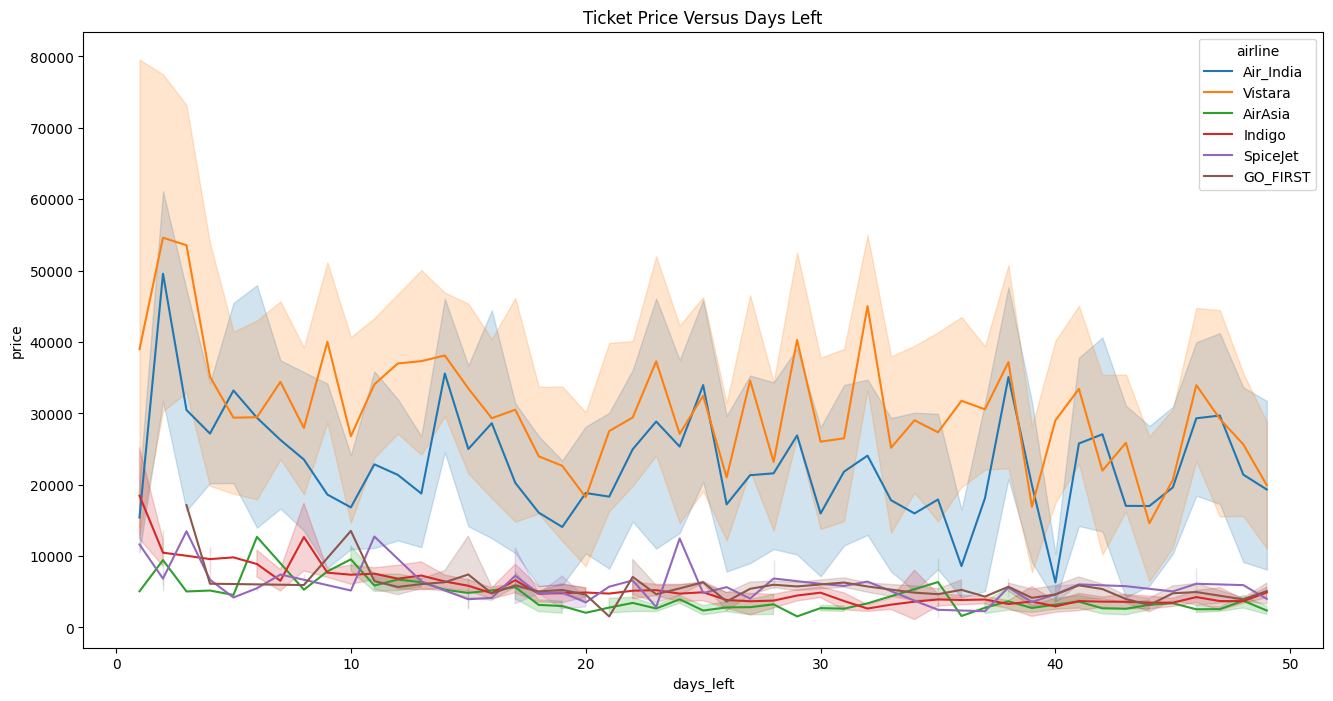

In [54]:
plt.figure(figsize = (16, 8))
sns.lineplot(data = data, x = 'days_left', y= 'price', hue = 'airline')
plt.title('Ticket Price Versus Days Left')
plt.show()

<ipython-input-56-152172b59a1d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='source_city', data=filtered_data, palette='Set2')


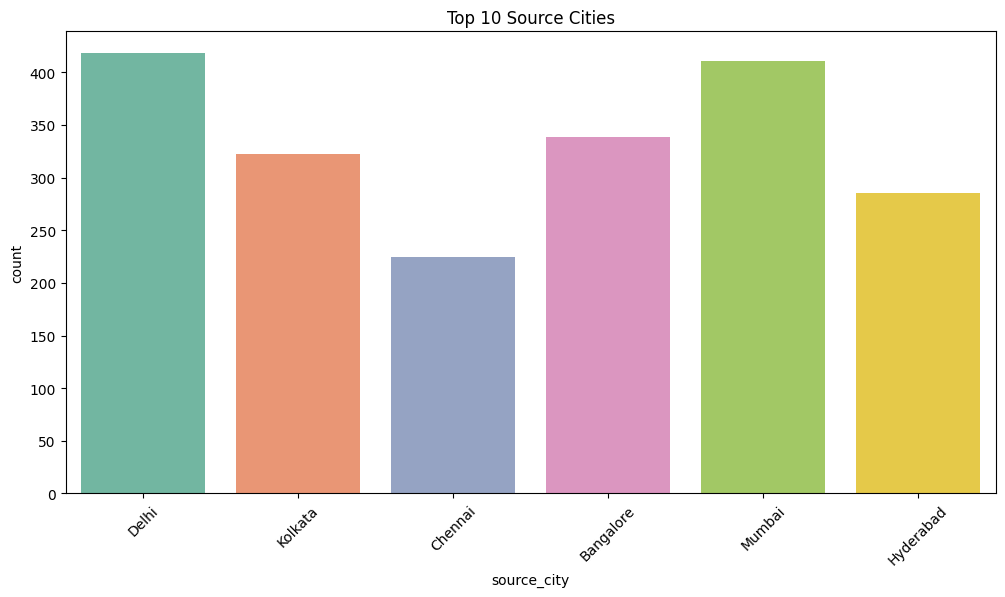

In [56]:
top_cities = data['source_city'].value_counts().nlargest(10).index
filtered_data = data[data['source_city'].isin(top_cities)]

plt.figure(figsize=(12,6))
sns.countplot(x='source_city', data=filtered_data, palette='Set2')
plt.xticks(rotation=45)
plt.title('Top 10 Source Cities')
plt.show()

In [90]:
!pip install catboost

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 99.2/99.2 MB 6.4 MB/s eta 0:00:00


In [68]:
#abel Encoding All Categorical Features

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])

In [69]:
x = data.drop(['price'], axis=1)
y = data['price']

In [70]:
#Train-Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [71]:
#Feature Scaling (MinMaxScaler)
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler(feature_range=(0, 1))
x_train = mmscaler.fit_transform(x_train)
x_test = mmscaler.transform(x_test)

# Convert back to DataFrame
x_train = pd.DataFrame(x_train, columns=x.columns)
x_test = pd.DataFrame(x_test, columns=x.columns)

In [92]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.svm import SVR
#Bayesian Ridge Regression
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import ElasticNet
# Huber Regressor (Robust to Outliers)
from sklearn.linear_model import HuberRegressor
from catboost import CatBoostRegressor
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    ExtraTreesRegressor(),
    GradientBoostingRegressor(),
    xgb.XGBRegressor(),
    KNeighborsRegressor(n_neighbors=5),
    BaggingRegressor(),
    Ridge(),
    Lasso(alpha=0.1),
    SVR(kernel='rbf'),
    MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42),
    CatBoostRegressor(verbose=0),
    LGBMRegressor(),
    ElasticNet(alpha=0.1, l1_ratio=0.5),
    HuberRegressor(),
    BayesianRidge()
]

In [93]:
model_dict = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest" : RandomForestRegressor(),
    "KNeighbors" : KNeighborsRegressor(),
    "Extra Trees" :ExtraTreesRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBRegressor" : xgb.XGBRegressor(),
    "BaggingRegressor" : BaggingRegressor(),
    "Ridge" :Ridge(),
    "Lasso" : Lasso(),
    "MLPRegressor" : MLPRegressor(),
    "CatBoostRegressor" : CatBoostRegressor(),
    "LGBMRegressor" : LGBMRegressor(),
    "ElasticNet" : ElasticNet(),
    "HuberRegressor" : HuberRegressor(),
    "BayesianRidge" : BayesianRidge()
}


In [94]:
def MAPE(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [95]:
from sklearn import metrics
import numpy as np
import pandas as pd

# Make sure Results is initialized as an empty DataFrame
Results = pd.DataFrame(columns=[
    'Model Name',
    'Mean_Absolute_Error_MAE',
    'Adj_R_Square',
    'Root_Mean_Squared_Error_RMSE',
    'Mean_Absolute_Percentage_Error_MAPE',
    'Mean_Squared_Error_MSE',
    'Root_Mean_Squared_Log_Error_RMSLE',
    'R2_score'
])

for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y_test, y_pred)
    adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1)
    mape = MAPE(y_test, y_pred)
    rmsle = np.log(rmse)

    # Create a new DataFrame row
    new_row = pd.DataFrame([{
        'Model Name': str(model.__class__.__name__),
        'Mean_Absolute_Error_MAE': mae,
        'Adj_R_Square': adj_r2,
        'Root_Mean_Squared_Error_RMSE': rmse,
        'Mean_Absolute_Percentage_Error_MAPE': mape,
        'Mean_Squared_Error_MSE': mse,
        'Root_Mean_Squared_Log_Error_RMSLE': rmsle,
        'R2_score': r2
    }])

    # Use pd.concat to add the new row
    Results = pd.concat([Results, new_row], ignore_index=True)

<ipython-input-95-fc335a0051f8>:42: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  Results = pd.concat([Results, new_row], ignore_index=True)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000876 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 578
[LightGBM] [Info] Number of data points in the train set: 1400, number of used features: 11
[LightGBM] [Info] Start training from score 20374.205714


In [97]:
result_df = Results.sort_values(by='Adj_R_Square', ascending=False).reset_index(drop=True)
result_df

Model Name  Mean_Absolute_Error_MAE  Adj_R_Square  \
0           CatBoostRegressor              2831.921940      0.952544   
1                XGBRegressor              2915.311768      0.949488   
2       RandomForestRegressor              2855.954150      0.948996   
3         ExtraTreesRegressor              2935.040550      0.946808   
4               LGBMRegressor              2998.133315      0.946504   
5   GradientBoostingRegressor              3044.428665      0.946271   
6            BaggingRegressor              2917.000500      0.943157   
7         KNeighborsRegressor              3999.364667      0.920236   
8                MLPRegressor              4004.302749      0.918733   
9       DecisionTreeRegressor              3459.666667      0.915302   
10                      Ridge              4591.312940      0.901021   
11              BayesianRidge              4600.679057      0.900853   
12                      Lasso              4603.275807      0.900804   
13           LinearRegression              4603.580715      0.900800   
14             HuberRegressor              4242.318761      0.899210   
15                 ElasticNet              5591.084515      0.869092   
16                        SVR             15754.716633     -0.354659   

    Root_Mean_Squared_Error_RMSE  Mean_Absolute_Percentage_Error_MAPE  \
0                    4951.237627                            20.762518   
1                    5108.175604                            22.830044   
2                    5133.000782                            20.544036   
3                    5241.933835                            20.541969   
4                    5256.912174                            21.791783   
5                    5268.342293                            22.797964   
6                    5418.837930                            20.864380   
7                    6419.073414                            31.337560   
8                    6479.257728                            29.843930   
9                    6614.643621                            22.738579   
10                   7150.555926                            43.342948   
11                   7156.629170                            43.638141   
12                   7158.389759                            43.719311   
13                   7158.549159                            43.726800   
14                   7215.688464                            31.138370   
15                   8223.405156                            54.946160   
16                  26453.557515                            69.546852   

    Mean_Squared_Error_MSE  Root_Mean_Squared_Log_Error_RMSLE  R2_score  
0             2.451475e+07                           8.507393  0.953416  
1             2.609346e+07                           8.538598  0.950416  
2             2.634770e+07                           8.543446  0.949933  
3             2.747787e+07                           8.564446  0.947785  
4             2.763513e+07                           8.567299  0.947486  
5             2.775543e+07                           8.569471  0.947258  
6             2.936380e+07                           8.597637  0.944201  
7             4.120450e+07                           8.767029  0.921701  
8             4.198078e+07                           8.776361  0.920226  
9             4.375351e+07                           8.797041  0.916857  
10            5.113045e+07                           8.874945  0.902839  
11            5.121734e+07                           8.875794  0.902674  
12            5.124254e+07                           8.876040  0.902626  
13            5.124483e+07                           8.876063  0.902622  
14            5.206616e+07                           8.884013  0.901061  
15            6.762439e+07                           9.014740  0.871496  
16            6.997907e+08                          10.183146 -0.329782

Learning rate set to 0.043179
0:	learn: 21752.4842509	total: 22ms	remaining: 21.9s
1:	learn: 20916.3474614	total: 23.1ms	remaining: 11.5s
2:	learn: 20144.6230001	total: 24.2ms	remaining: 8.04s
3:	learn: 19410.9254315	total: 26ms	remaining: 6.47s
4:	learn: 18785.8657457	total: 32.3ms	remaining: 6.44s
5:	learn: 18104.5810015	total: 32.7ms	remaining: 5.42s
6:	learn: 17461.5926453	total: 33.3ms	remaining: 4.73s
7:	learn: 16821.4563552	total: 34.9ms	remaining: 4.32s
8:	learn: 16237.4749975	total: 37.4ms	remaining: 4.12s
9:	learn: 15673.6650477	total: 39.1ms	remaining: 3.87s
10:	learn: 15130.6365107	total: 41.7ms	remaining: 3.75s
11:	learn: 14627.7030583	total: 43.4ms	remaining: 3.58s
12:	learn: 14149.5360005	total: 50.2ms	remaining: 3.81s
13:	learn: 13714.4650158	total: 52ms	remaining: 3.66s
14:	learn: 13243.7796552	total: 53.7ms	remaining: 3.53s
15:	learn: 12790.8134934	total: 59.9ms	remaining: 3.68s
16:	learn: 12367.7663535	total: 60.7ms	remaining: 3.51s
17:	learn: 11977.6491158	total: 64

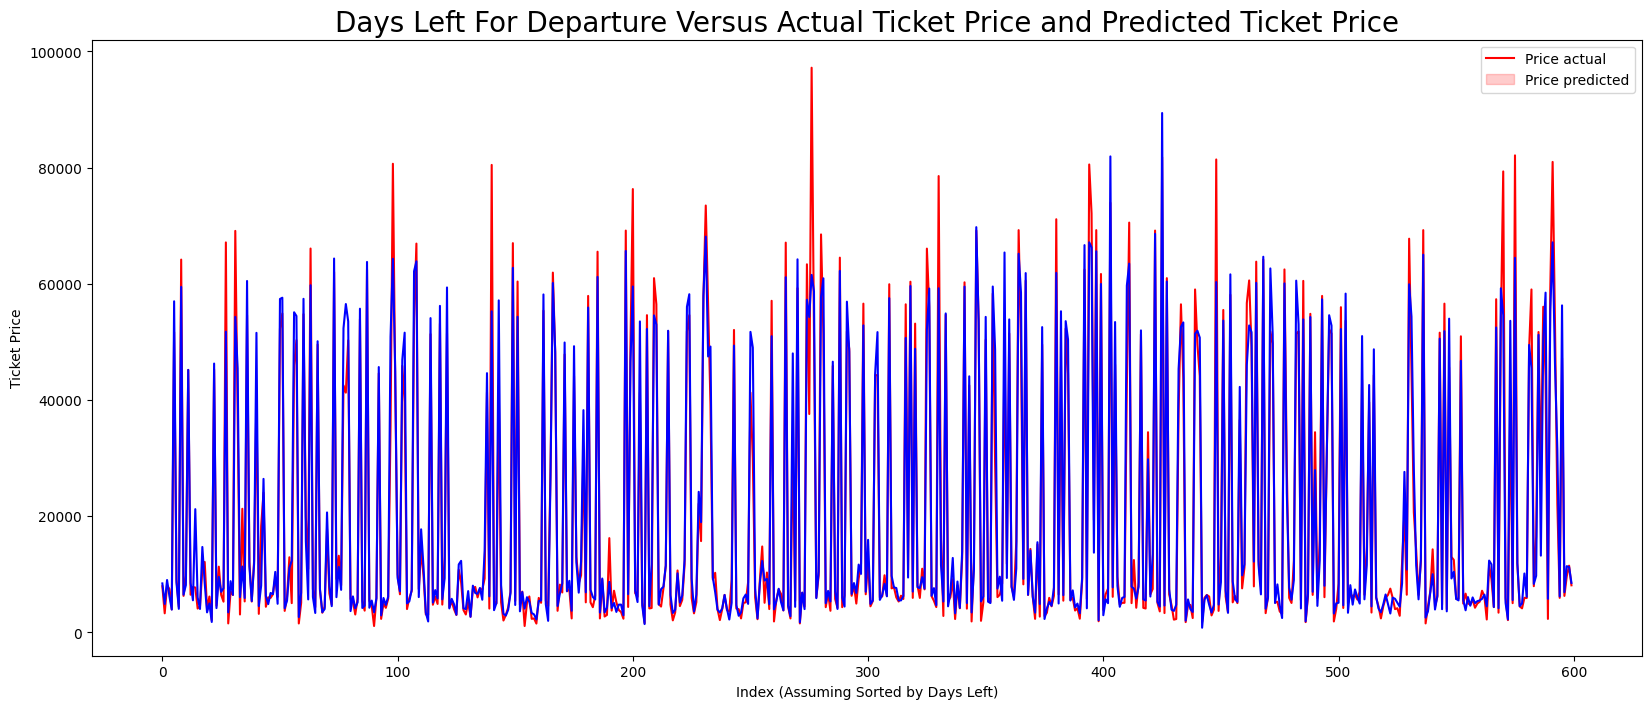

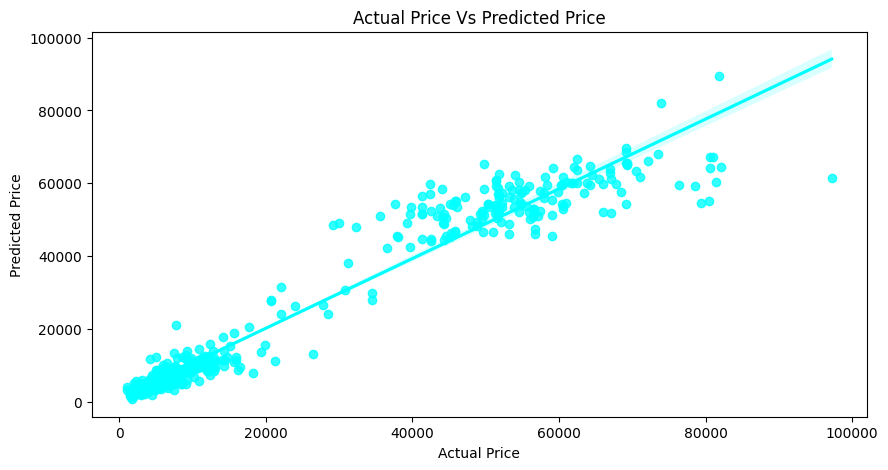

In [98]:
# Predict with best model
modelCatBoostRegressor= CatBoostRegressor()
modelCatBoostRegressor.fit(x_train, y_train)
y_pred = modelCatBoostRegressor.predict(x_test)

# Create comparison DataFrame
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).reset_index(drop=True)

# Plot Actual vs Predicted over Days Left
plt.figure(figsize=(20, 8))
sns.lineplot(data=comparison, x=comparison.index, y='Actual', color='red')
sns.lineplot(data=comparison, x=comparison.index, y='Predicted', color='blue')
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price', fontsize=20)
plt.legend(labels=['Price actual', 'Price predicted'])
plt.xlabel('Index (Assuming Sorted by Days Left)')
plt.ylabel('Ticket Price')
plt.show()

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(10, 5))
sns.regplot(x='Actual', y='Predicted', data=comparison, color='cyan')
plt.title('Actual Price Vs Predicted Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [ ]:
# ÿ¥ÿ±ŸÉÿ© ÿßŸÑÿ∑Ÿäÿ±ÿßŸÜ
# ÿßŸÑŸÖÿØŸäŸÜÿ© ÿßŸÑŸÖÿµÿØÿ±
# ŸàŸÇÿ™ ÿßŸÑÿ•ŸÇŸÑÿßÿπ
# ÿπÿØÿØ ÿßŸÑŸÖÿ≠ÿ∑ÿßÿ™
# ÿßŸÑŸÖÿØŸäŸÜÿ© ÿßŸÑŸàÿ¨Ÿáÿ©
# ŸÜŸàÿπ ÿßŸÑÿ™ÿ∞ŸÉÿ±ÿ© (ÿßŸÇÿ™ÿµÿßÿØŸäÿ© / ÿ£ÿπŸÖÿßŸÑ)
# ŸÖÿØÿ© ÿßŸÑÿ±ÿ≠ŸÑÿ©
# ÿßŸÑÿ£ŸäÿßŸÖ ÿßŸÑŸÖÿ™ÿ®ŸÇŸäÿ© ÿ≠ÿ™Ÿâ ŸÖŸàÿπÿØ ÿßŸÑÿ≥ŸÅÿ±

In [99]:
#  ÿÆÿ∑Ÿàÿßÿ™ ÿßŸÑÿ™ŸÜÿ®ÿ§
# ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ ŸÜŸÅÿ≥ ÿßŸÑŸÖÿπÿßŸÑÿ¨ÿ© ÿßŸÑŸÖÿ≥ÿ®ŸÇÿ© ÿßŸÑÿ™Ÿä ÿ∑ÿ®ŸÇÿ™Ÿáÿß ÿπŸÑŸâ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑÿ£ÿµŸÑŸäÿ©.
# ÿ™ÿ≠ŸàŸäŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿ®ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ LabelEncoder ŸÉŸÖÿß ŸÅÿπŸÑÿ™ ŸÖŸÜ ŸÇÿ®ŸÑ.
# ÿ™ÿ∑ÿ®ŸäŸÇ MinMaxScaler .
# ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ÿßŸÑŸÖÿØÿ±ÿ®

In [100]:
# airline
# Air_India
# source_city
# Delhi
# departure_time
# Morning
# stops
# one
# destination_city
# Mumbai
# class
# Economy
# duration
# 8.5
# days_left
# 30

In [102]:
data.head()

airline  flight  source_city  departure_time  stops  arrival_time  \
0        1     219            2               4      1             1   
1        5     524            4               4      1             5   
2        5     532            4               4      1             5   
3        5     557            1               5      1             4   
4        1     214            0               0      1             5   

   destination_city  class  duration  days_left  price  \
0                 4      1     19.75         40   7366   
1                 5      0      9.83         42  64831   
2                 0      1     10.50         41   6195   
3                 2      0     14.50         14  60160   
4                 5      1      8.25         20   6578   

   booking_before_one_month  
0                         1  
1                         1  
2                         1  
3                         0  
4                         0

In [103]:
# ÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑÿ™ÿ∞ŸÉÿ±ÿ© ÿßŸÑÿ¨ÿØŸäÿØÿ©
new_data = pd.DataFrame([{
    'airline': 'Air_India',
    'flight': 'AI-506',
    'source_city': 'Delhi',
    'departure_time': 'Morning',
    'stops': 'one',
    'arrival_time': 'Night',
    'destination_city': 'Mumbai',
    'class': 'Economy',
    'duration': 8.5,
    'days_left': 30,
    'booking_before_one_month': int(30 > 30)  # ÿ•ÿ∞ÿß ŸÉÿßŸÜÿ™ ÿßŸÑÿ£ŸäÿßŸÖ ÿßŸÑŸÖÿ™ÿ®ŸÇŸäÿ© ÿ£ŸÉÿ´ÿ± ŸÖŸÜ 30 ŸäŸàŸÖ ‚Üí 1 Ÿàÿ•ŸÑÿß 0
}])

# ÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿ∫Ÿäÿ± ÿßŸÑŸÖÿ≥ÿ™ÿÆÿØŸÖÿ© ÿ£Ÿà ÿ•ÿπÿßÿØÿ© ÿ™ÿ±ÿ™Ÿäÿ® ÿßŸÑÿ£ÿπŸÖÿØÿ© ŸÑÿ™ÿ™ÿ∑ÿßÿ®ŸÇ ŸÖÿπ x.columns
new_data = new_data[x.columns]  # ÿßŸÑÿ¢ŸÜ Ÿäÿ¨ÿ® ÿ£ŸÜ ŸäÿπŸÖŸÑ ÿ®ÿØŸàŸÜ ÿÆÿ∑ÿ£

In [104]:
# ÿ™ÿ≠ŸàŸäŸÑ ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÅÿ¶ŸàŸäÿ© ÿ®ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in new_data.select_dtypes(include=['object']).columns:
    new_data[col] = le.fit_transform(new_data[col])

# ÿ™ÿ∑ÿ®ŸäŸÇ MinMaxScaler
new_data_scaled = mmscaler.transform(new_data)

# ÿßŸÑÿ™ŸÜÿ®ÿ§ ÿ®ÿßŸÑÿ≥ÿπÿ± ÿ®ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ ÿ£ŸÅÿ∂ŸÑ ŸÜŸÖŸàÿ∞ÿ¨ (ŸÖÿ´ŸÑÿßŸã ExtraTreesRegressor)
predicted_price = modelCatBoostRegressor.predict(new_data_scaled)
print(f"\nüí∞ ÿßŸÑÿ≥ÿπÿ± ÿßŸÑŸÖÿ™ŸàŸÇÿπ ŸÑŸÑÿ™ÿ∞ŸÉÿ±ÿ©: {int(predicted_price[0])}")


üí∞ ÿßŸÑÿ≥ÿπÿ± ÿßŸÑŸÖÿ™ŸàŸÇÿπ ŸÑŸÑÿ™ÿ∞ŸÉÿ±ÿ©: 37491
